# **FINAL PROJECT REPORT** - **GROUP 8**
# SUBJECT: DATA MINING
# *TOPIC: PREDICTING CANCER MORTALITY IN U.S. COUNTIES*
# List of members:
1. Duong Van Nhat Long - 20521561
2. Vo Đoan To Loan - 20521544
3. Nguyen Thanh Luan - 20521582
4. Dinh Thi Tu Uyen - 20522139

### About dataset: These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov and this dataset have 34 feature and 3047 samples
### Data Source: https://data.world/nrippner/ols-regression-challenge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries and dataset

## Define function

In [ ]:
# Function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

## Import necessary libraries

In [ ]:
# Import to libraries that manipulate datasets and numbers: numpy, pandas, graphing libraries, data visualization: seaborn, matplotlib.
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# To use machine learning algorithms, we import the sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Classification
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Import dataset "cancer_reg.csv"

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data Mining/cancer_reg.csv", encoding='latin-1')

# Survey dataset

In [ ]:
# View 10 samples first
data.head(10)

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   
5        428.0               152             176.0          505.4      52313   
6        250.0                97             175.9          461.8      37782   
7        146.0                71             183.6          404.0      40189   
8         88.0                36             190.5          459.4      42579   
9       4025.0              1380             177.8          510.9      60397   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   
5       61023            15.6   180.259902  (51046.4, 54545.6]       45.4   
6       41516            23.2     0.000000  (37413.8, 40362.7]       42.6   
7       20848            17.8     0.000000  (37413.8, 40362.7]       51.7   
8       13088            22.3     0.000000  (40362.7, 42724.4]       49.3   
9      843954            13.1   427.748432  (54545.6, 61494.5]       35.8   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   
5  ...                     38.8                32.6              43.2   
6  ...                     35.0                28.3              46.4   
7  ...                     33.1                25.9              50.9   
8  ...                     37.8                29.9              48.1   
9  ...                      NaN                44.4              31.4   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   
5                    20.2  84.882631  1.653205  1.538057      3.314635   
6                    28.7  75.106455  0.616955  0.866157      8.356721   
7                    24.1  89.406636  0.305159  1.889077      2.286268   
8                    26.6  91.787477  0.185071  0.208205      0.616903   
9                    16.5  74.729668  6.710854  6.041472      2.699184   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  
5             51.220360   4.964476  
6             51.013900   4.204317  
7             48.967033   5.889179  
8             53.446998   5.587583  
9             50.063573   5.533430  

[10 rows x 34 columns]

In [ ]:
# View basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [ ]:
# Count number of fearutes and samples
print("Number of features:", data.shape[1])
print("Number of samples :", data.shape[0])

Number of features: 34
Number of samples : 3047


This dataset have 34 features and 3047 samples

In [ ]:
# Statistical statistics of quantitative attributes such as: count the number of values, maximum, minimum, mean, standard deviation, quartiles...
data.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [ ]:
# Print out each data type of each features
dtype = pd.DataFrame(data= {'types': data.dtypes})
dtype

types
avgAnnCount              float64
avgDeathsPerYear           int64
TARGET_deathRate         float64
incidenceRate            float64
medIncome                  int64
popEst2015                 int64
povertyPercent           float64
studyPerCap              float64
binnedInc                 object
MedianAge                float64
MedianAgeMale            float64
MedianAgeFemale          float64
Geography                 object
AvgHouseholdSize         float64
PercentMarried           float64
PctNoHS18_24             float64
PctHS18_24               float64
PctSomeCol18_24          float64
PctBachDeg18_24          float64
PctHS25_Over             float64
PctBachDeg25_Over        float64
PctEmployed16_Over       float64
PctUnemployed16_Over     float64
PctPrivateCoverage       float64
PctPrivateCoverageAlone  float64
PctEmpPrivCoverage       float64
PctPublicCoverage        float64
PctPublicCoverageAlone   float64
PctWhite                 float64
PctBlack                 float64
PctAsian                 float64
PctOtherRace             float64
PctMarriedHouseholds     float64
BirthRate                float64

In [ ]:
# Count data type
dtype = pd.DataFrame(data= {'types': data.dtypes})
dtype.value_counts()

types  
float64    29
int64       3
object      2
dtype: int64

We see there are 29 features of type float, 3 features of type integer, 2 features of type object

In [ ]:
# Check if dataset have missing values
data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

We see there are 3 features PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone have missing values

In [ ]:
# Calculate percent of missing values and sample
missing_samples = data.isna().any(axis=1).sum()
percent_missing = (missing_samples / len(data)) * 100

print('Number missing samples:', missing_samples)
print('Percent missing samples:', percent_missing)


Number missing samples: 2456
Percent missing samples: 80.60387266163438


We see 2456 samples with missing data and with 80.6%

In [ ]:
# Calculate percentage of missing values ​​for each features and total missing values ​​for all features
missing_data = pd.DataFrame({
    'Number missing': data.isna().sum(),
    'Percent %': (data.isna().sum() * 100 / len(data))
})
missing_data.sort_values(by='Percent %', ascending=False, inplace=True)

missing_data_total = pd.DataFrame({
    'Number missing': data.isna().sum(),
    'Percent %': (data.isna().sum() * 100 / data.size)
})

print(missing_data_total.sum())
print(missing_data.head(3))

Number missing    3046.000000
Percent %            2.940211
dtype: float64
                         Number missing  Percent %
PctSomeCol18_24                    2285  74.991795
PctPrivateCoverageAlone             609  19.986872
PctEmployed16_Over                  152   4.988513


We see that there are 3046 missing values ​​and account for about 2.94% of the total values
+ The PctSomeCol18_24 property has 2285 and is about 75%
+ The PctPrivateCoverageAlone property has 609 and is about 19%
+ The PctEmployed16_Over property has 152 and is about 5%

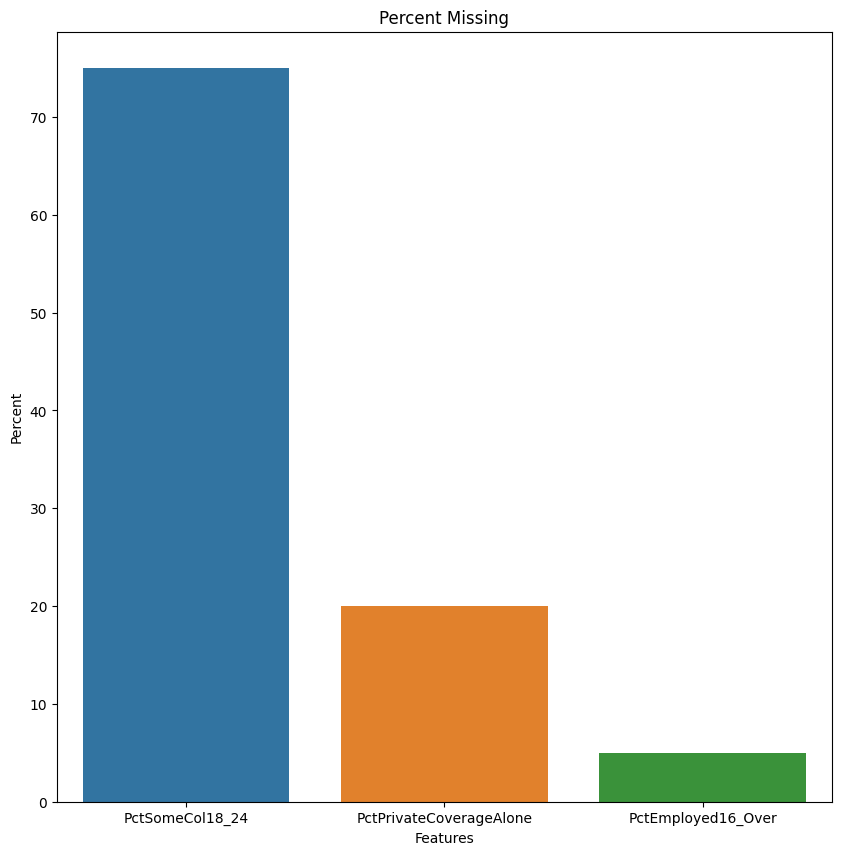

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=missing_data.head(3).index, y='Percent %', data=missing_data.head(3))

plt.xticks(rotation='horizontal')
plt.xlabel('Features')
plt.ylabel('Percent')
plt.title('Percent Missing')

plt.show()

We see that PctSomeCol18_24 has quite a large data loss

# Data preprocessing

## Feature extraction

Create County and State from Geography

In [ ]:
# Extract County and State from Geography
County = []
State = []
for i in range(len(data)):
  County.append(data['Geography'][i][0:data['Geography'][i].find(','):])
  State.append(data['Geography'][i][data['Geography'][i].find(',') + 2::])

data['County'] = County
data['State'] = State

# Let's see what we've got
data[['Geography', 'County', 'State']].sample(5)

Geography           County           State
319          Iron County, Michigan      Iron County        Michigan
404   Jones County, North Carolina     Jones County  North Carolina
269          Norton city, Virginia      Norton city        Virginia
2220         Parke County, Indiana     Parke County         Indiana
2166     Gallatin County, Kentucky  Gallatin County        Kentucky

Discrete binnedInc feature (replace by number of the decile)

In [ ]:
data[['binnedInc']]

binnedInc
0      (61494.5, 125635]
1     (48021.6, 51046.4]
2     (48021.6, 51046.4]
3       (42724.4, 45201]
4     (48021.6, 51046.4]
...                  ...
3042    (45201, 48021.6]
3043  (48021.6, 51046.4]
3044  (51046.4, 54545.6]
3045  (48021.6, 51046.4]
3046  (40362.7, 42724.4]

[3047 rows x 1 columns]

In [ ]:
# Get the range
start = []
end = []
for i in range(len(data)):
  start.append(float(data['binnedInc'][i][1:data['binnedInc'][i].find(','):]))
  end.append(float(data['binnedInc'][i][data['binnedInc'][i].find(',') + 2:-1:]))

df_range = pd.DataFrame(data= {'Start': start, 'End': end})
df_range.head(5)

Start       End
0  61494.5  125635.0
1  48021.6   51046.4
2  48021.6   51046.4
3  42724.4   45201.0
4  48021.6   51046.4

In [ ]:
# Create binnedInc_mean (float) from binnedInc
data['binnedInc_mean'] = (df_range['Start'] + df_range['End'])/2
data[['binnedInc', 'binnedInc_mean']].head(5)

binnedInc  binnedInc_mean
0   (61494.5, 125635]        93564.75
1  (48021.6, 51046.4]        49534.00
2  (48021.6, 51046.4]        49534.00
3    (42724.4, 45201]        43962.70
4  (48021.6, 51046.4]        49534.00

In [ ]:
# Create binnedInc_decile (category) from binnedInc_mean
# get start unique
origin = np.sort(np.unique(np.array(data['binnedInc_mean'])))
# create map list
decile = np.arange(1, 11, 1, dtype=int)
map = {origin[i]: int(decile[i]) for i in range(len(origin))}
print(origin)
print(decile)
print(map)

[28429.05 35815.95 38888.25 41543.55 43962.7  46611.3  49534.   52796.
 58020.05 93564.75]
[ 1  2  3  4  5  6  7  8  9 10]
{28429.05: 1, 35815.95: 2, 38888.25: 3, 41543.55: 4, 43962.7: 5, 46611.3: 6, 49534.0: 7, 52796.0: 8, 58020.05: 9, 93564.75: 10}


In [ ]:
data['binnedInc_decile'] = data['binnedInc_mean'].replace(map)
data[['binnedInc','binnedInc_decile','binnedInc_mean']].head()

binnedInc  binnedInc_decile  binnedInc_mean
0   (61494.5, 125635]              10.0        93564.75
1  (48021.6, 51046.4]               7.0        49534.00
2  (48021.6, 51046.4]               7.0        49534.00
3    (42724.4, 45201]               5.0        43962.70
4  (48021.6, 51046.4]               7.0        49534.00

## Features encoding

We need to encoder ['County', 'State'] before give them to sklearn model
.But 'County' have high Cardinality so that we should not encoder it

In [ ]:
len(data['County'].unique())

1819

In [ ]:
len(data['State'].unique())

51

In [ ]:
# Label Encoder 'State'

label_encoder = preprocessing.LabelEncoder()

data['State_enc']= label_encoder.fit_transform(data['State'])
data['State_enc'].unique()

array([47, 48, 49, 27, 28, 29, 30, 31, 32, 46, 22, 23, 33, 34,  0,  3,  4,
       26, 42, 43, 18, 19, 20, 21, 44, 45,  5, 50, 24, 25, 16, 17,  6,  7,
        8,  9, 36, 37, 35, 38, 39, 40, 14, 15, 10, 11, 12, 13,  1,  2, 41])

In [ ]:
data['State_enc']

0       47
1       47
2       47
3       47
4       47
        ..
3042    16
3043    16
3044    16
3045    16
3046    16
Name: State_enc, Length: 3047, dtype: int64

Let's use corelation matrix to see relation of features


<ipython-input-26-e3c2f4f137c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot=True)


<Axes: >

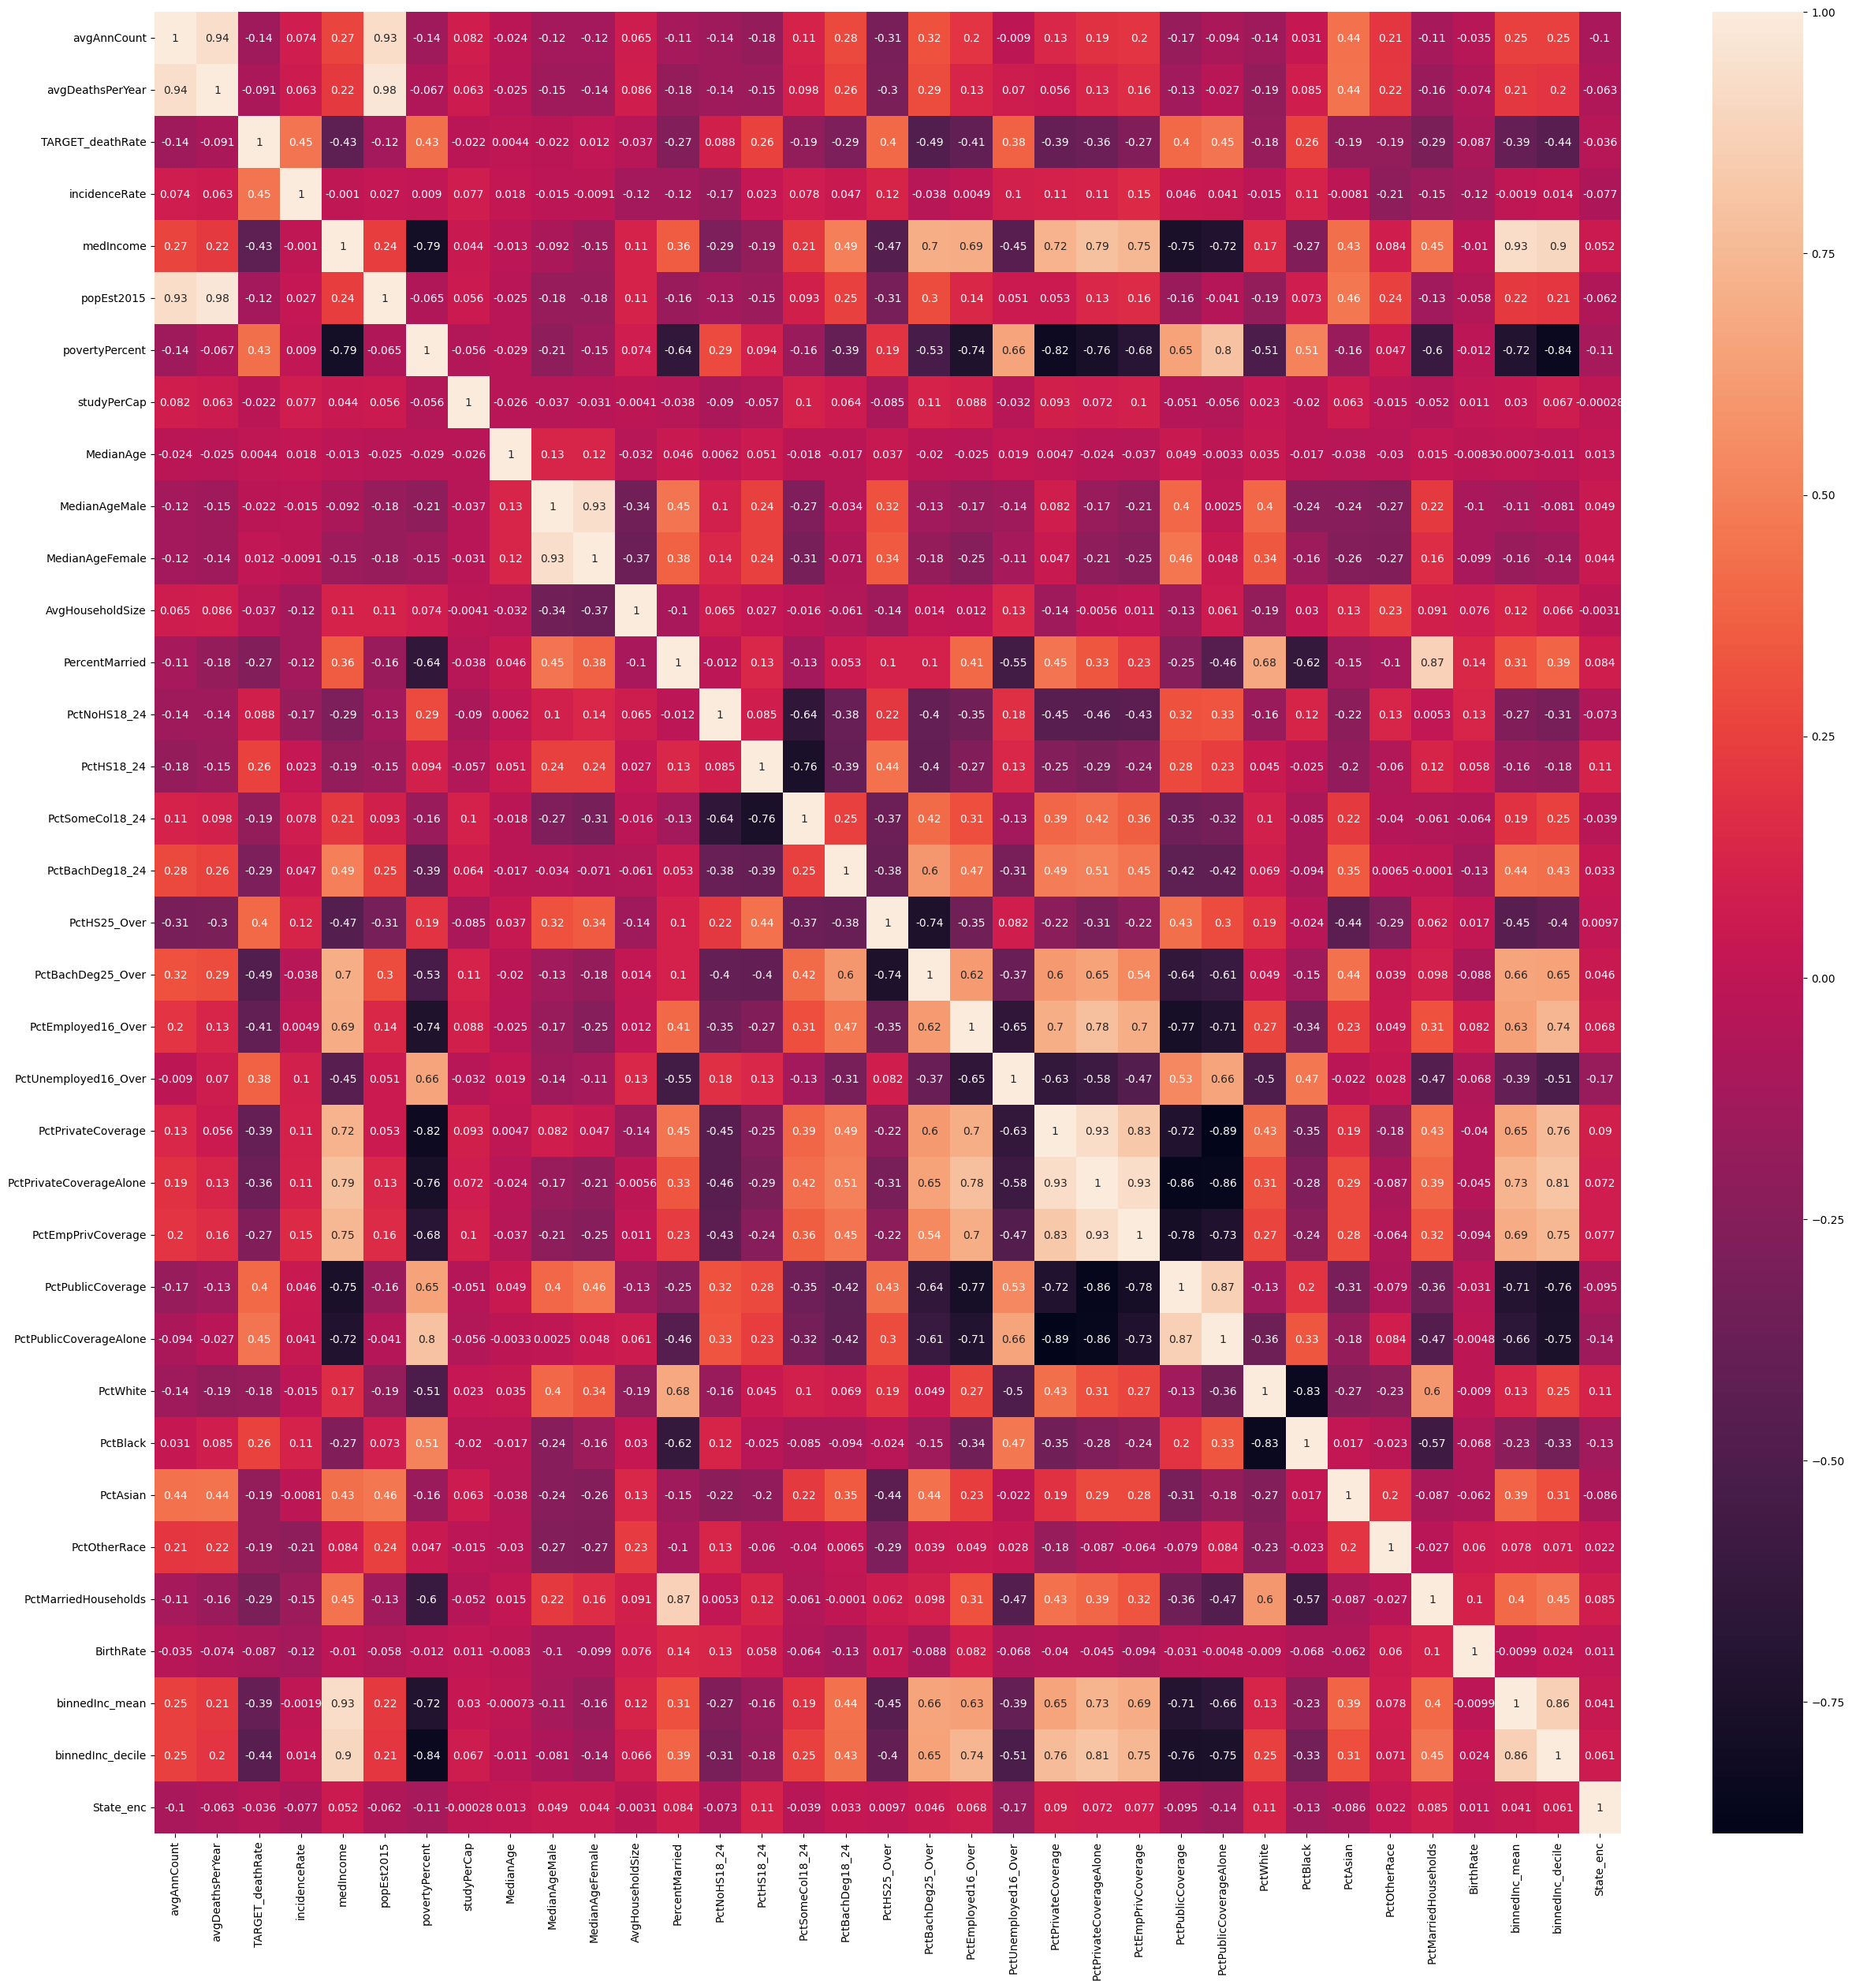

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [ ]:
# Correlation between target with other features
corr = np.abs(data.corr())
corr['TARGET_deathRate']

<ipython-input-27-1b06c44253c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(data.corr())


avgAnnCount                0.143532
avgDeathsPerYear           0.090715
TARGET_deathRate           1.000000
incidenceRate              0.449432
medIncome                  0.428615
popEst2015                 0.120073
povertyPercent             0.429389
studyPerCap                0.022285
MedianAge                  0.004375
MedianAgeMale              0.021929
MedianAgeFemale            0.012048
AvgHouseholdSize           0.036905
PercentMarried             0.266820
PctNoHS18_24               0.088463
PctHS18_24                 0.261976
PctSomeCol18_24            0.188688
PctBachDeg18_24            0.287817
PctHS25_Over               0.404589
PctBachDeg25_Over          0.485477
PctEmployed16_Over         0.412046
PctUnemployed16_Over       0.378412
PctPrivateCoverage         0.386066
PctPrivateCoverageAlone    0.363704
PctEmpPrivCoverage         0.267399
PctPublicCoverage          0.404572
PctPublicCoverageAlone     0.449358
PctWhite                   0.177400
PctBlack                   0

## Handling missing data 

Because the loss PctSomeCol18_24 attribute is so large by about 75%, we decided not to include it in the model

In [ ]:
data = data.drop('PctSomeCol18_24', axis=1)

Before choosing the optimal method, we will test on many ways

In [ ]:
X_t = data.copy()

Fill missing value of 'PctPrivateCoverageAlone' by mean of State

In [ ]:
# Create dictionary to mapping missing values in PctPrivateCoverageAlone by mean group by State
dic_map = X_t[['State', 'PctPrivateCoverageAlone']].groupby(by= ['State']).mean().to_dict()['PctPrivateCoverageAlone']
dic_map

{'Alabama': 45.13653846153846,
 'Alaska': 44.48125,
 'Arizona': 36.853846153846156,
 'Arkansas': 39.644067796610166,
 'California': 45.84102564102564,
 'Colorado': 50.18936170212766,
 'Connecticut': 60.63333333333333,
 'Delaware': 50.86666666666667,
 'District of Columbia': 55.6,
 'Florida': 41.337037037037035,
 'Georgia': 43.150769230769235,
 'Hawaii': 56.0,
 'Idaho': 46.87777777777777,
 'Illinois': 52.25,
 'Indiana': 54.482716049382724,
 'Iowa': 55.73544303797469,
 'Kansas': 54.65301204819277,
 'Kentucky': 45.25473684210526,
 'Louisiana': 43.449090909090906,
 'Maine': 44.791666666666664,
 'Maryland': 56.25217391304348,
 'Massachusetts': 58.1,
 'Michigan': 47.77460317460318,
 'Minnesota': 55.7171875,
 'Mississippi': 39.50135135135135,
 'Missouri': 47.084883720930236,
 'Montana': 47.02142857142857,
 'Nebraska': 56.4359375,
 'Nevada': 49.53333333333333,
 'New Hampshire': 56.1625,
 'New Jersey': 58.495000000000005,
 'New Mexico': 35.328,
 'New York': 53.97708333333333,
 'North Carolina':

In [ ]:
# Let's fill missing values in PctPrivateCoverageAlone
X_t['PctPrivateCoverageAlone'] = X_t.PctPrivateCoverageAlone.fillna(X_t.State.map(dic_map))

Fill missing values of 'PctPrivateCoverageAlone' by mean State

In [ ]:
# Create dictionary to mapping missing values in PctEmployed16_Over by mean group by State
dic_map = X_t[['State', 'PctEmployed16_Over']].groupby(by= ['State']).mean().to_dict()['PctEmployed16_Over']
X_t['PctEmployed16_Over'] = X_t.PctPrivateCoverageAlone.fillna(X_t.State.map(dic_map))

Let's see if any columns have missing data?

In [ ]:
# Calculate percentage of missing values ​​for each features and total missing values ​​for all features
missing_data = pd.DataFrame({
    'Number missing': X_t.isna().sum(),
    'Percent %': (X_t.isna().sum() * 100 / len(X_t))
})
missing_data.sort_values(by='Percent %', ascending=False, inplace=True)

missing_data_total = pd.DataFrame({
    'Number missing': X_t.isna().sum(),
    'Percent %': (X_t.isna().sum() * 100 / X_t.size)
})

print(missing_data_total.sum())
print(missing_data.head(3))

Number missing    0.0
Percent %         0.0
dtype: float64
                      Number missing  Percent %
avgAnnCount                        0        0.0
PctBlack                           0        0.0
PctUnemployed16_Over               0        0.0


### **Compare performance** Imputed missing values


In [ ]:
for i in ['mean', 'median', 'most_frequent', 'constant']:

  X_o = data[['PctPrivateCoverageAlone','PctEmployed16_Over']]
  y_o = data['TARGET_deathRate']

  imputer_ = SimpleImputer(missing_values=np.nan, strategy=i)
  X_o = pd.DataFrame(imputer_.fit_transform(X_o),columns= X_o.columns)

  X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_o, y_o, train_size= 0.85)
  ln1 = LinearRegression()
  ln1.fit(X_o_train,y_o_train)
  print('Score with '+i+ ' data:', ln1.score(X_o_test,y_o_test))

# With mean by State
X_train, X_test, y_train, y_test = train_test_split(X_t[['PctPrivateCoverageAlone','PctEmployed16_Over']], X_t.TARGET_deathRate, train_size= 0.85)
ln2 = LinearRegression()
ln2.fit(X_train,y_train)
print('Score with mean by State data:', ln2.score(X_test,y_test))

# With KNNInputer
X = data[['PctPrivateCoverageAlone','PctEmployed16_Over']]
y = data['TARGET_deathRate']

imputer = KNNImputer(n_neighbors=2, weights="distance")
X = pd.DataFrame(imputer.fit_transform(X), columns= X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.85)
ln3 = LinearRegression()
ln3.fit(X_train,y_train)
print('Score with KNNImputer data:', ln3.score(X_test,y_test))


Score with mean data: 0.17851409766796955
Score with median data: 0.17801732608002985
Score with most_frequent data: 0.20092603832092992
Score with constant data: 0.05016665945912813
Score with mean by State data: 0.0787954111548167
Score with KNNImputer data: 0.20650797598321957


Through many run test, we found that KNNInputer always gives better results than other methods, so we will choose KNNInputer to handle missing values

In [ ]:
data_drop = data.drop(labels= ['Geography', 'binnedInc', 'County', 'State'], axis= 1)
data_cate = data[['Geography', 'binnedInc', 'County', 'State']]
imputer = KNNImputer(n_neighbors=2, weights="distance")
data= pd.DataFrame(imputer.fit_transform(data_drop), columns= data_drop.columns)
data = pd.concat((data, data_cate), axis= 1)
data.head(5)

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0             469.0             164.9          489.8    61898.0   
1        173.0              70.0             161.3          411.6    48127.0   
2        102.0              50.0             174.7          349.7    49348.0   
3        427.0             202.0             194.8          430.4    44243.0   
4         57.0              26.0             144.4          350.1    49955.0   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0    260131.0            11.2   499.748204       39.3           36.9  ...   
1     43269.0            18.6    23.111234       33.0           32.2  ...   
2     21026.0            14.6    47.560164       45.0           44.0  ...   
3     75882.0            17.1   342.637253       42.8           42.2  ...   
4     10321.0            12.5     0.000000       48.3           47.8  ...   

   PctOtherRace  PctMarriedHouseholds  BirthRate  binnedInc_mean  \
0      1.843479             52.856076   6.118831        93564.75   
1      3.741352             45.372500   4.333096        49534.00   
2      2.747358             54.444868   3.729488        49534.00   
3      1.362643             51.021514   4.603841        43962.70   
4      0.492135             54.027460   6.796657        49534.00   

   binnedInc_decile  State_enc                     Geography  \
0              10.0       47.0     Kitsap County, Washington   
1               7.0       47.0   Kittitas County, Washington   
2               7.0       47.0  Klickitat County, Washington   
3               5.0       47.0      Lewis County, Washington   
4               7.0       47.0    Lincoln County, Washington   

            binnedInc            County       State  
0   (61494.5, 125635]     Kitsap County  Washington  
1  (48021.6, 51046.4]   Kittitas County  Washington  
2  (48021.6, 51046.4]  Klickitat County  Washington  
3    (42724.4, 45201]      Lewis County  Washington  
4  (48021.6, 51046.4]    Lincoln County  Washington  

[5 rows x 38 columns]

In [ ]:
data.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
binnedInc_mean             0
binnedInc_decile           0
State_enc                  0
Geography     

Now we will drop 'Geography', 'binnedInc', 'County', 'State'

In [ ]:
data_FE = data.drop(labels= ['Geography', 'binnedInc', 'County', 'State'], axis= 1)

In [ ]:
data_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

## Feature selection

### Using threshold by correlation matrix to choose important feature

Let's use corelation matrix to see relation of features



In [ ]:
# Correlation between target with other features
corr = np.abs(data_FE.corr())
corr['TARGET_deathRate']

avgAnnCount                0.143532
avgDeathsPerYear           0.090715
TARGET_deathRate           1.000000
incidenceRate              0.449432
medIncome                  0.428615
popEst2015                 0.120073
povertyPercent             0.429389
studyPerCap                0.022285
MedianAge                  0.004375
MedianAgeMale              0.021929
MedianAgeFemale            0.012048
AvgHouseholdSize           0.036905
PercentMarried             0.266820
PctNoHS18_24               0.088463
PctHS18_24                 0.261976
PctBachDeg18_24            0.287817
PctHS25_Over               0.404589
PctBachDeg25_Over          0.485477
PctEmployed16_Over         0.411772
PctUnemployed16_Over       0.378412
PctPrivateCoverage         0.386066
PctPrivateCoverageAlone    0.386172
PctEmpPrivCoverage         0.267399
PctPublicCoverage          0.404572
PctPublicCoverageAlone     0.449358
PctWhite                   0.177400
PctBlack                   0.257024
PctAsian                   0

In [ ]:
# Find out features have correlation with target variable 'TARGET_deathRate'
# Choose threshold = 0.2 that mean choose correlation features with 'TARGET_deathRate'
df_ = pd.DataFrame(data_FE.corr().round(2).loc['TARGET_deathRate'])
pos_corr = df_.loc[df_.TARGET_deathRate >= 0.2] # Positive correlation
neg_corr = df_.loc[df_.TARGET_deathRate <= -0.2] # Negative correlation
result = pd.concat([pos_corr, neg_corr])
print(result)
corr_features = pd.concat([pos_corr, neg_corr]).index.to_list()
print('Features have correlation with TARGET_deathRate:\n', corr_features)

                         TARGET_deathRate
TARGET_deathRate                     1.00
incidenceRate                        0.45
povertyPercent                       0.43
PctHS18_24                           0.26
PctHS25_Over                         0.40
PctUnemployed16_Over                 0.38
PctPublicCoverage                    0.40
PctPublicCoverageAlone               0.45
PctBlack                             0.26
medIncome                           -0.43
PercentMarried                      -0.27
PctBachDeg18_24                     -0.29
PctBachDeg25_Over                   -0.49
PctEmployed16_Over                  -0.41
PctPrivateCoverage                  -0.39
PctPrivateCoverageAlone             -0.39
PctEmpPrivCoverage                  -0.27
PctMarriedHouseholds                -0.29
binnedInc_mean                      -0.39
binnedInc_decile                    -0.44
Features have correlation with TARGET_deathRate:
 ['TARGET_deathRate', 'incidenceRate', 'povertyPercent', 'PctHS18_24'

In [ ]:
len(corr_features)

20

### Using GradientBoosting to choose important feature

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_FE.drop(labels='TARGET_deathRate', axis=1), data_FE['TARGET_deathRate'])

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
feature_importances = gb_model.feature_importances_

GrB_features = []
#Print important score of each feature
for feature, importance in enumerate(feature_importances):
  if importance >= 0.02:
    GrB_features.append(data_FE.columns[feature])
    print(f"Feature: {data_FE.columns[feature]}: {importance}")

Feature: avgAnnCount: 0.03693159577791837
Feature: avgDeathsPerYear: 0.07262676787480352
Feature: TARGET_deathRate: 0.24511439139014168
Feature: incidenceRate: 0.07255671810354647
Feature: medIncome: 0.04401139027919389
Feature: popEst2015: 0.03276530493685399
Feature: MedianAgeMale: 0.02026021810325572
Feature: PctBachDeg18_24: 0.057540635231588325
Feature: PctHS25_Over: 0.17703894227169664
Feature: PctUnemployed16_Over: 0.03965397834486867
Feature: PctPublicCoverage: 0.030932120099036512
Feature: PctAsian: 0.027173446780554725


In [ ]:
data_FE_important = data_FE[corr_features]
# data_FE_important = data_FE[GrB_features]
data_FE_important

TARGET_deathRate  incidenceRate  povertyPercent  PctHS18_24  \
0                164.9     489.800000            11.2        39.5   
1                161.3     411.600000            18.6        22.4   
2                174.7     349.700000            14.6        36.6   
3                194.8     430.400000            17.1        41.2   
4                144.4     350.100000            12.5        43.0   
...                ...            ...             ...         ...   
3042             149.6     453.549422            12.4        27.9   
3043             150.1     453.549422            18.8        33.9   
3044             153.9     453.549422            15.0        44.5   
3045             175.0     453.549422            13.3        37.2   
3046             213.6     453.549422            13.9        43.3   

      PctHS25_Over  PctUnemployed16_Over  PctPublicCoverage  \
0             23.2                   8.0               32.9   
1             26.0                   7.8               31.1   
2             29.0                   7.0               42.1   
3             31.6                  12.1               45.3   
4             33.4                   4.8               44.0   
...            ...                   ...                ...   
3042          32.2                   4.3               31.7   
3043          23.1                   4.6               28.8   
3044          23.0                   6.4               26.6   
3045          36.1                   6.9               29.5   
3046          29.8                   9.2               25.1   

      PctPublicCoverageAlone   PctBlack  medIncome  PercentMarried  \
0                       14.0   2.594728    61898.0            52.5   
1                       15.3   0.969102    48127.0            44.5   
2                       21.1   0.739673    49348.0            54.2   
3                       25.0   0.782626    44243.0            52.7   
4                       22.7   0.270192    49955.0            57.8   
...                      ...        ...        ...             ...   
3042                    13.2   3.837754    46961.0            51.0   
3043                    17.7   2.326771    48609.0            52.6   
3044                    16.8   2.313188    51144.0            54.8   
3045                    14.0   1.176562    50745.0            58.8   
3046                    12.6  16.590100    41193.0            59.5   

      PctBachDeg18_24  PctBachDeg25_Over  PctEmployed16_Over  \
0                 6.9               19.6           51.900000   
1                 7.5               22.7           55.900000   
2                 9.5               16.0           45.900000   
3                 2.5                9.3           48.300000   
4                 2.0               15.0           48.200000   
...               ...                ...                 ...   
3042              8.4               15.2           51.700000   
3043              3.8               12.4           70.100000   
3044              2.5               12.8           64.800000   
3045              4.1               14.4           60.387353   
3046              4.8               13.7           48.800000   

      PctPrivateCoverage  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
0                   75.1                59.127109                41.6   
1                   70.2                53.800000                43.6   
2                   63.7                43.500000                34.9   
3                   58.4                40.300000                35.0   
4                   61.6                43.900000                35.1   
...                  ...                      ...                 ...   
3042                78.3                54.900000                44.6   
3043                64.5                53.300000                48.6   
3044                62.0                52.600000                47.8   
3045                75.9                56.300000                49.6   
3046   

## Outlier Processing

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


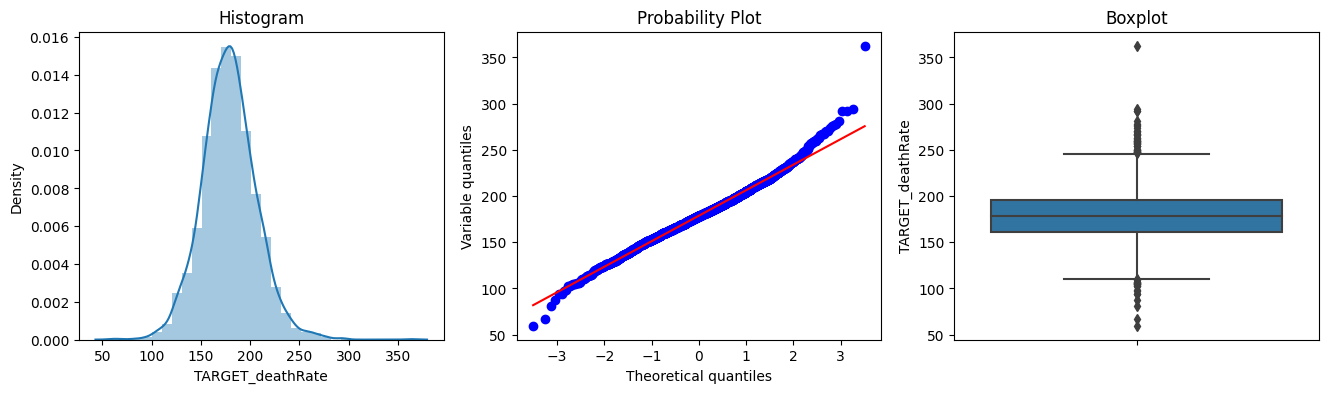

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


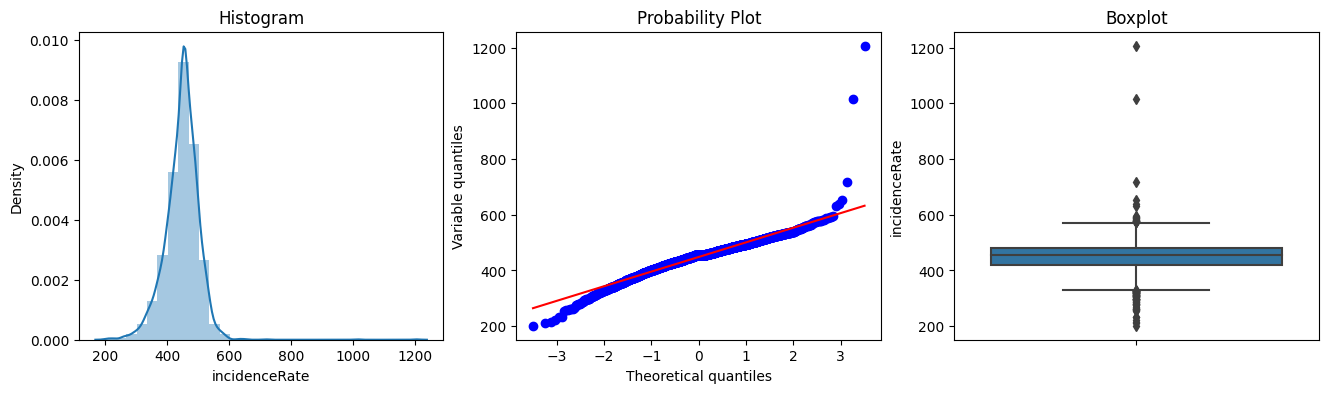

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


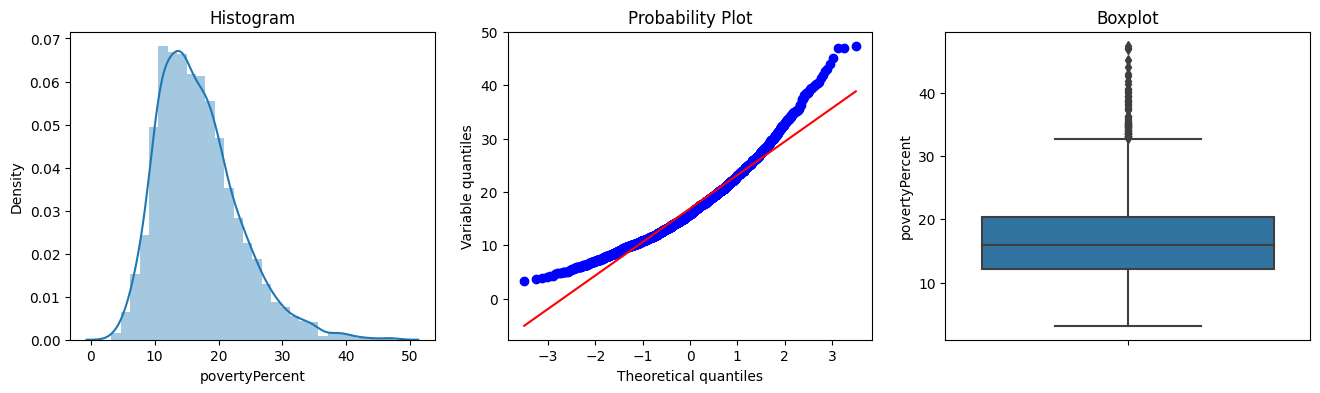

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


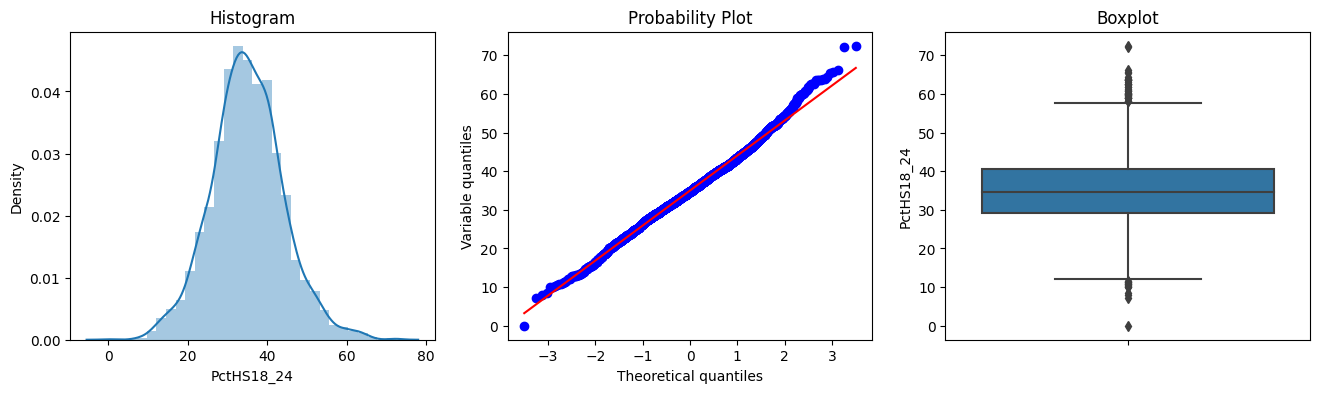

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


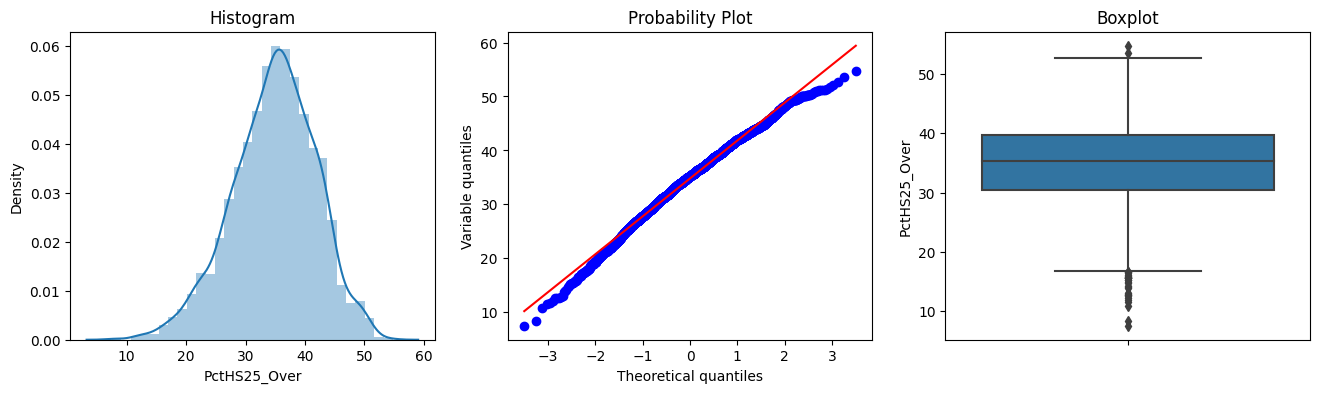

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


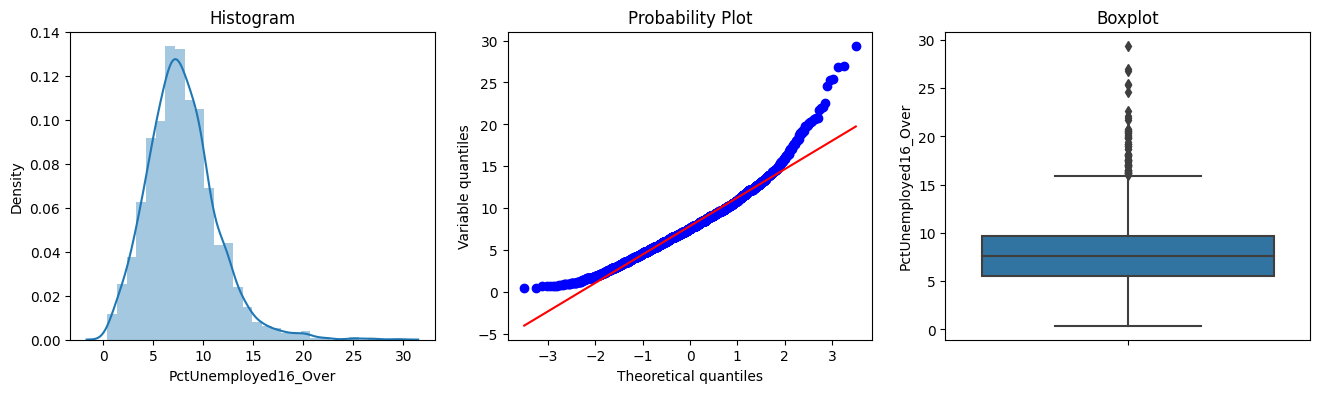

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


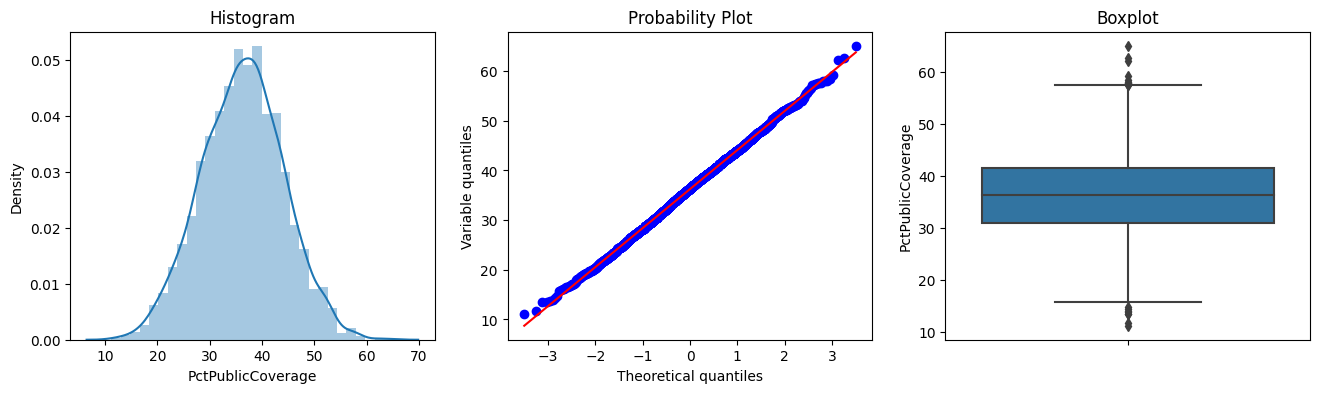

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


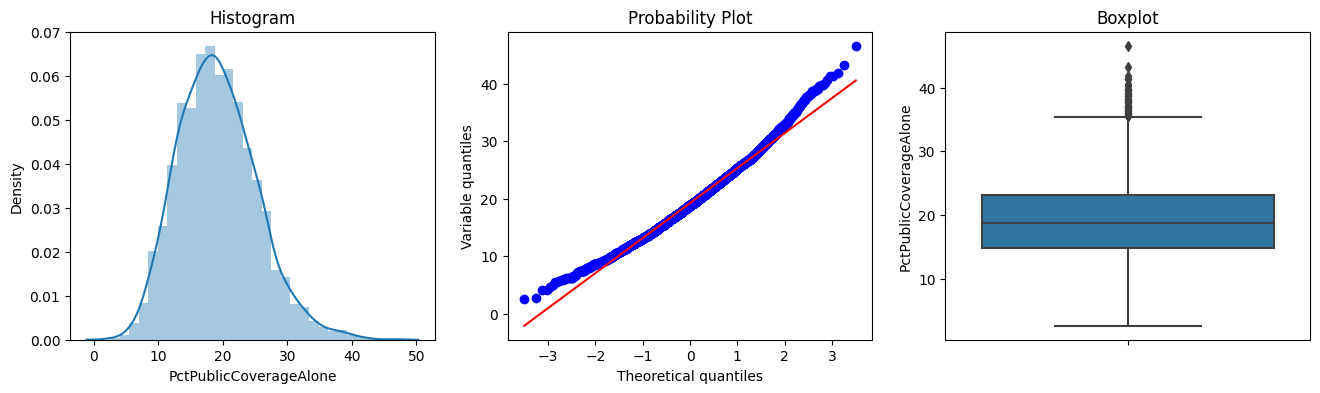

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


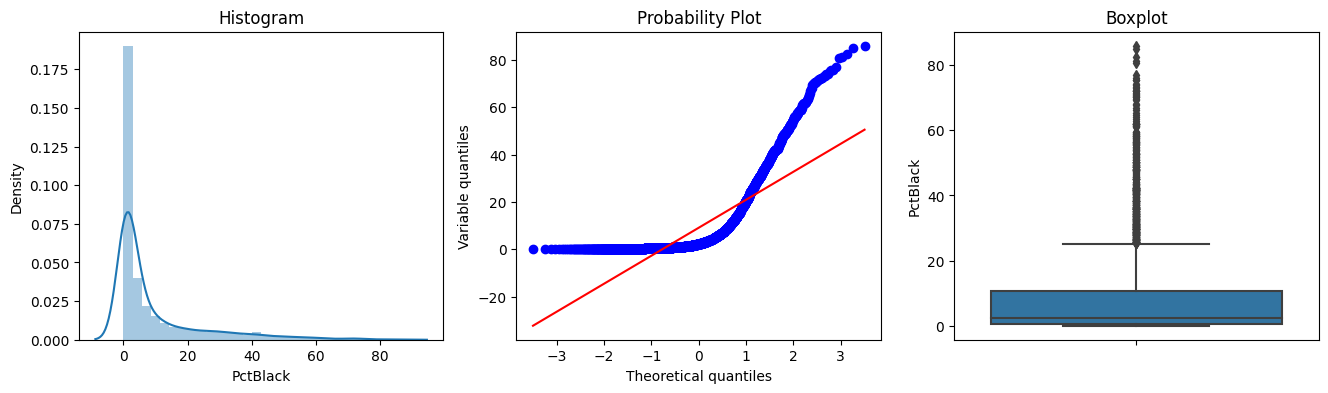

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


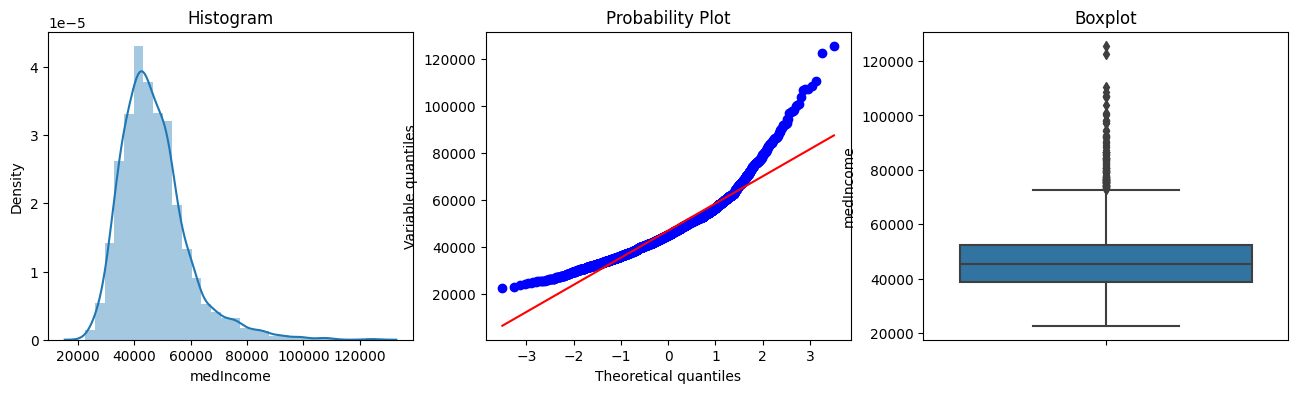

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


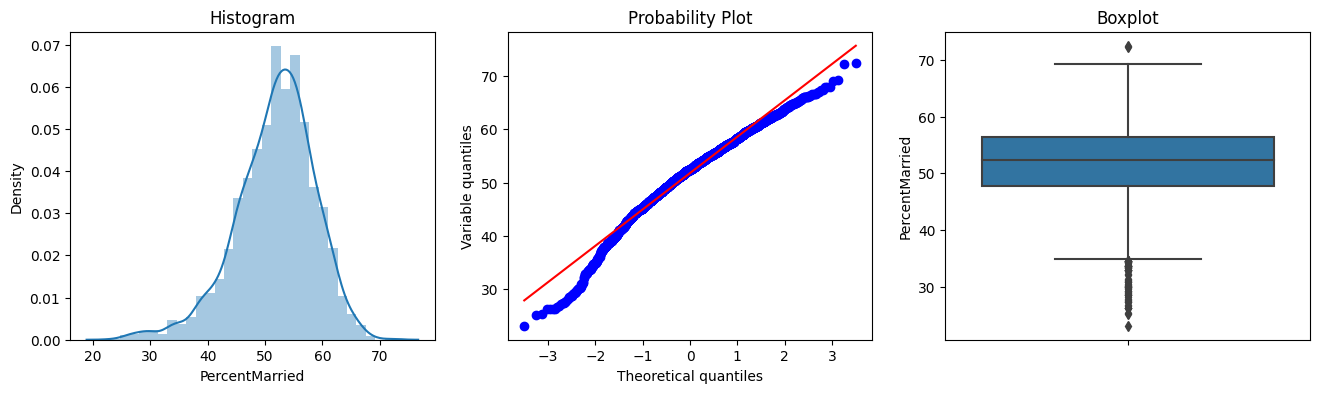

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


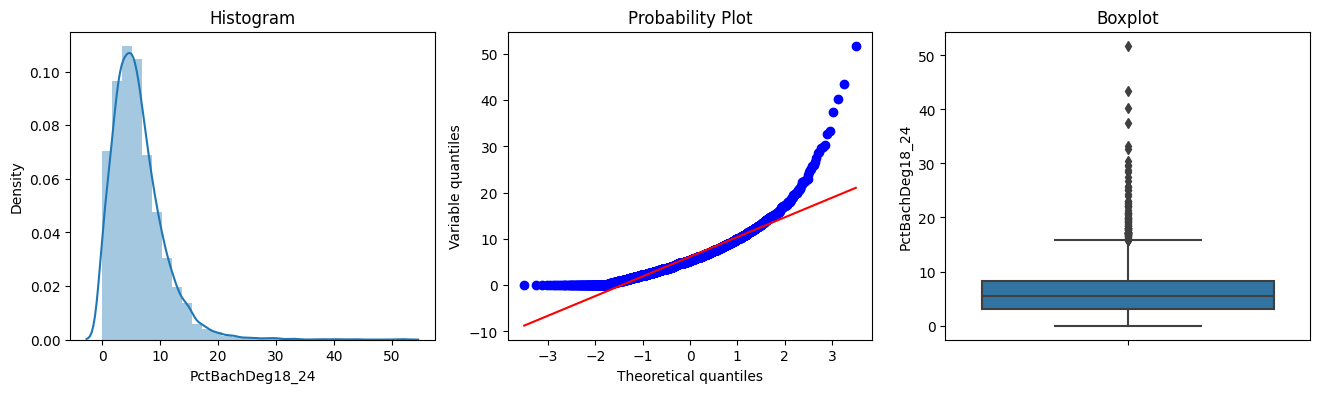

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


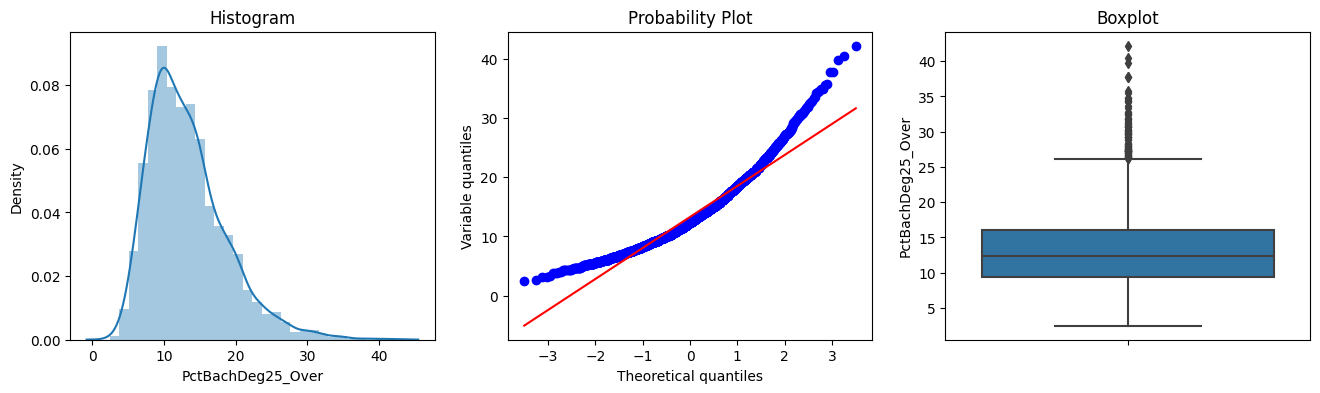

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


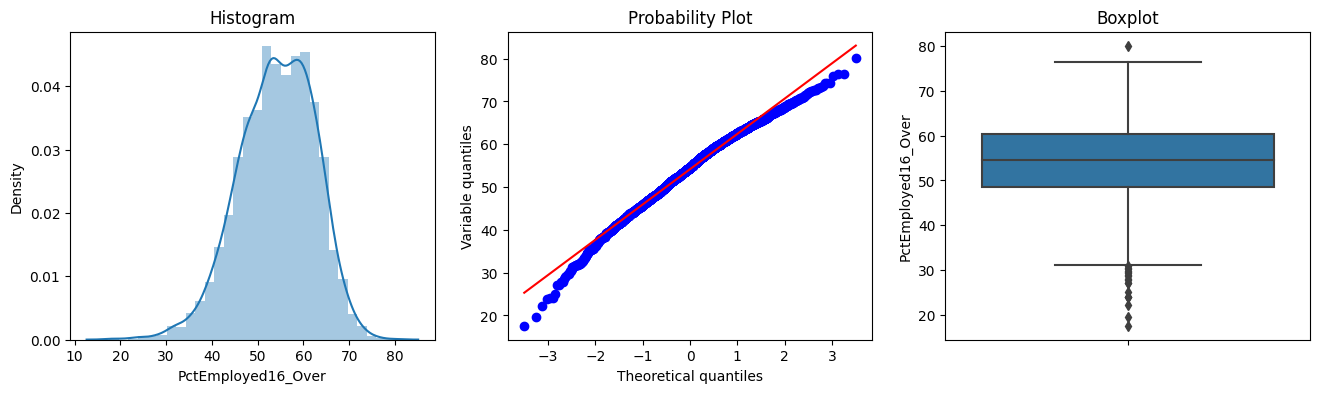

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


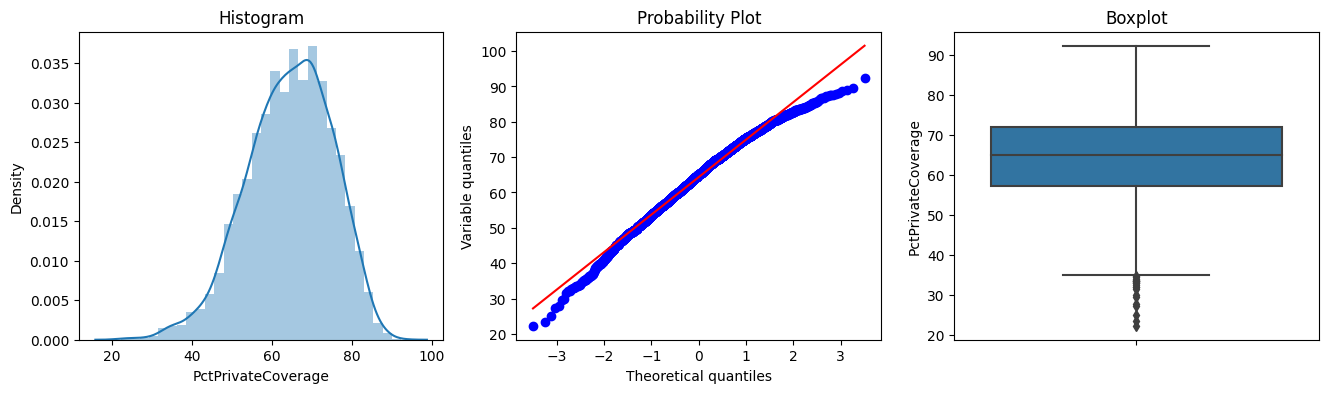

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


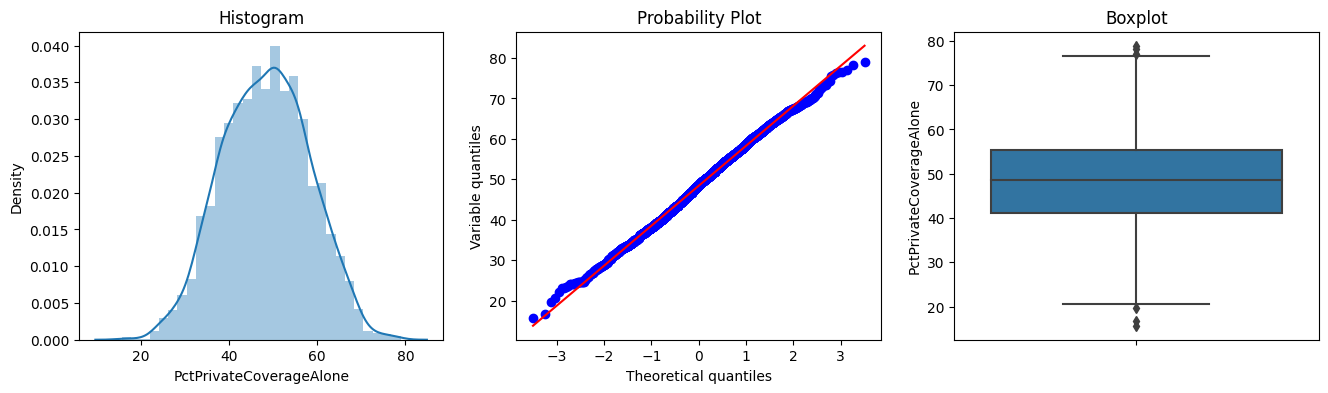

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


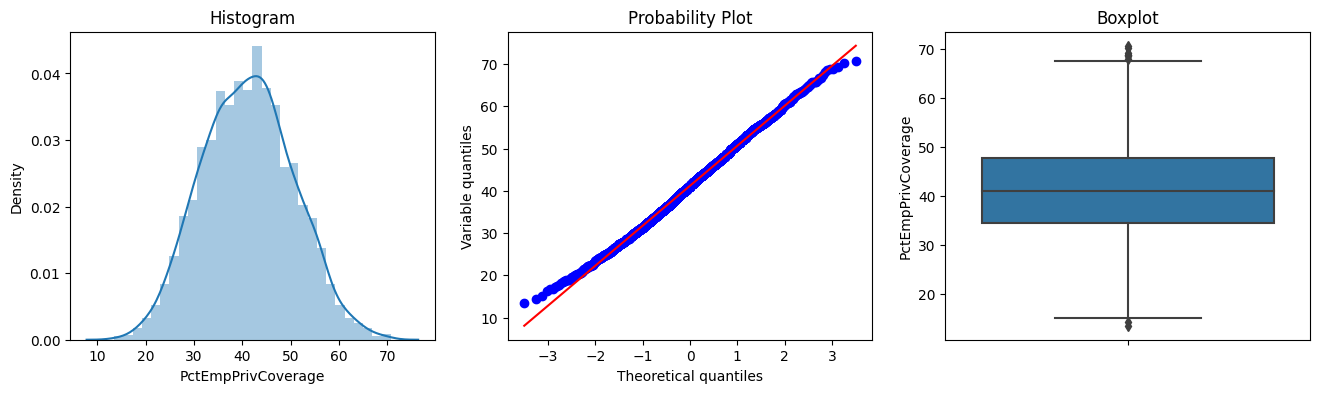

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


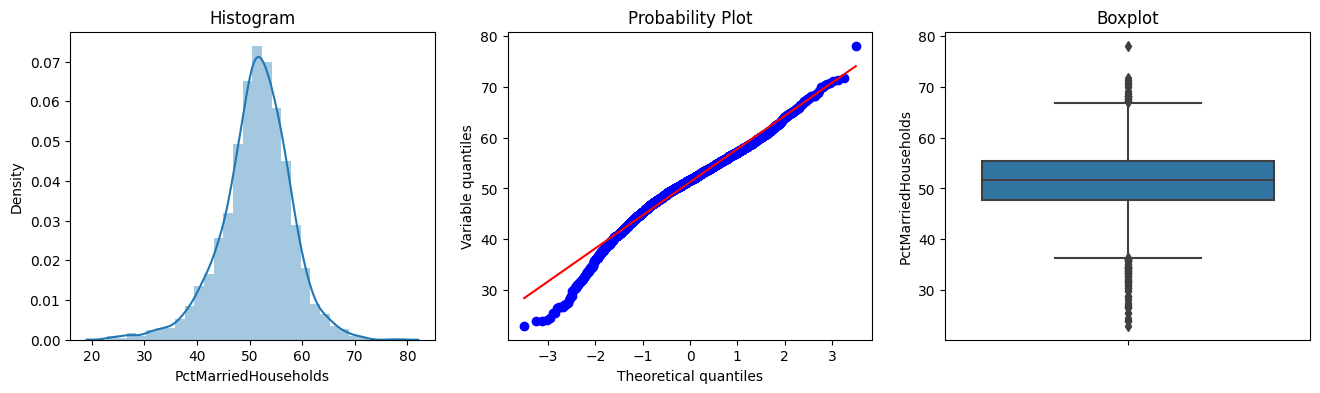

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


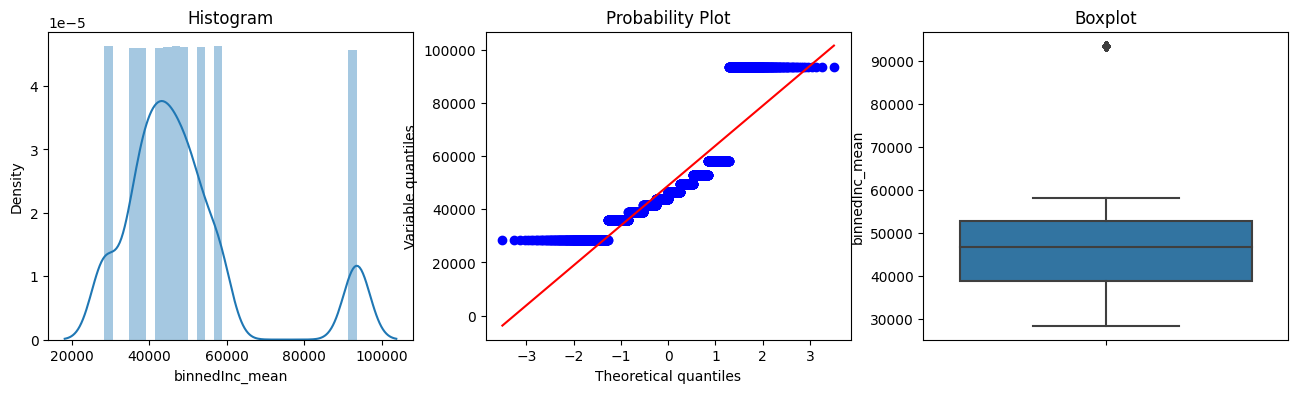

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


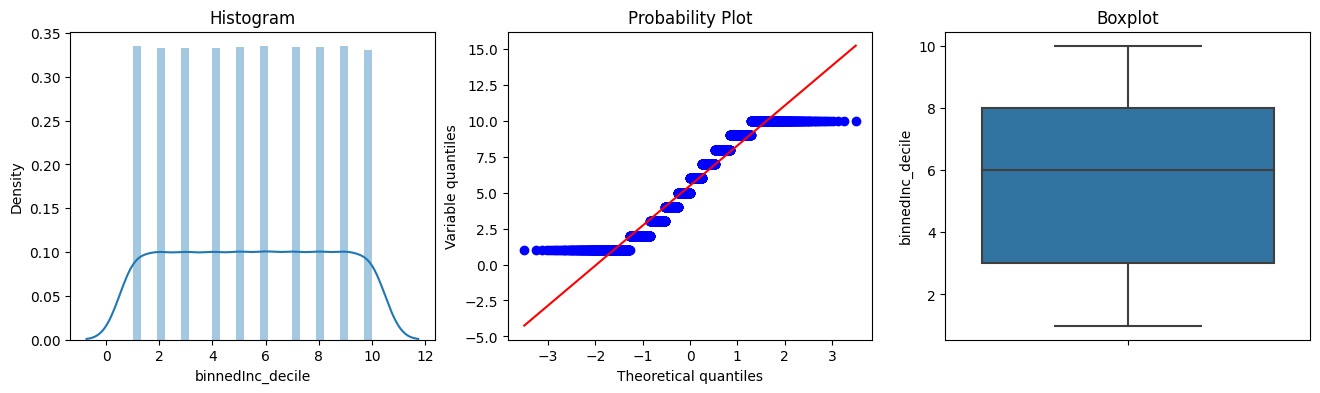

In [ ]:
#Visualize distribution of each column and find outliers
for col in data_FE_important.columns:
  diagnostic_plots(data_FE, col)

In [ ]:
# Include outlier
train, test = train_test_split(data_FE_important, train_size= 0.8)
X_train, y_train = train.drop(labels='TARGET_deathRate', axis=1), train['TARGET_deathRate']
X_test, y_test = test.drop(labels='TARGET_deathRate', axis=1), test['TARGET_deathRate']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 349.6654567337418
Score: 0.524734491908942


In [ ]:
# Ignore outlier
train_noOutlier = 0
test_noOutlier = 0
data_nonOutlier=pd.DataFrame()
for col in data_FE_important.columns:
  lower_bound = data_FE_important[col].quantile(0.1)
  upper_bound = data_FE_important[col].quantile(0.9)
  train_noOutlier = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]
  test_noOutlier = test[(test[col] >= lower_bound) & (test[col] <= upper_bound)]

len(train_noOutlier) + len(test_noOutlier)

2745

In [ ]:
data_FE_nonOutlier = pd.concat([train_noOutlier, test_noOutlier], ignore_index=True)
data_FE_nonOutlier.to_csv('data_FE_nonOutlier.csv', index=False)
train_noOutlier.to_csv('train.csv', index=False)
test_noOutlier.to_csv('test.csv', index=False)

In [ ]:
X_train, y_train = train_noOutlier.drop(labels='TARGET_deathRate', axis=1), train_noOutlier['TARGET_deathRate']
X_test, y_test = test_noOutlier.drop(labels='TARGET_deathRate', axis=1), test_noOutlier['TARGET_deathRate']

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 356.6884598390294
Score: 0.5055448705309386


## Standard Scaler

Standard scaler for feature non-category
 Data after Feature Engineer & Feature Selection include 20 columns and only binnedInc_mean & binnedInc_decile is category feature

In [ ]:
final_train = pd.read_csv('train.csv')
final_test = pd.read_csv('test.csv')

len(final_train) + len(final_test)

2745

In [ ]:
sd_scale_train = final_train.drop(labels=['TARGET_deathRate', 'binnedInc_mean', 'binnedInc_decile'], axis=1)
sd_scale_test = final_test.drop(labels=['TARGET_deathRate', 'binnedInc_mean', 'binnedInc_decile'], axis=1)

SS = StandardScaler()
SS.fit(sd_scale_train)
cols = sd_scale_train.columns
sd_scale_train = pd.DataFrame(SS.transform(sd_scale_train), columns=cols)
sd_scale_test = pd.DataFrame(SS.transform(sd_scale_test), columns=cols)

sd_scale_test

incidenceRate  povertyPercent  PctHS18_24  PctHS25_Over  \
0        -0.870417        3.721152   -0.595053      0.573728   
1         0.190088       -0.795963    0.717221      0.385185   
2         2.312905       -1.264404    0.172294      0.259490   
3        -2.393425       -0.879613   -1.440246     -0.101885   
4         0.036523       -0.913073   -0.606174     -2.317267   
..             ...             ...         ...           ...   
540       1.620957        0.442061    3.152713      1.170782   
541       0.399660       -0.779233   -0.094609      1.610716   
542      -0.785504        0.174380   -0.917561     -2.364403   
543       0.244288        0.140920   -0.072367     -1.468823   
544      -0.453080       -0.210411   -0.617295     -0.039037   

     PctUnemployed16_Over  PctPublicCoverage  PctPublicCoverageAlone  \
0                4.181380           1.469363                1.775079   
1               -0.732128          -1.374006               -1.034487   
2               -1.737817          -1.075453               -1.526161   
3               -1.105670          -2.525571               -1.543720   
4                0.101157          -1.189187               -0.771090   
..                    ...                ...                     ...   
540             -0.099981           0.488400                0.633693   
541             -0.214917          -0.179791               -0.068699   
542              0.560900          -0.648947                0.528334   
543              0.647102          -0.449911                0.124459   
544             -0.559725          -0.663164               -0.349655   

     PctBlack  medIncome  PercentMarried  PctBachDeg18_24  PctBachDeg25_Over  \
0    4.398899  -2.341730       -3.164111        -0.529545          -0.525366   
1   -0.235375   1.201401        1.017598        -0.504617          -0.346742   
2   -0.589817   0.946999        1.871610         1.589315           1.126900   
3   -0.617222   0.725975        1.297361        -0.853606          -1.574777   
4   -0.219598   1.878224        0.340279         0.517421           2.131656   
..        ...        ...             ...              ...                ...   
540 -0.522201  -1.000961        0.855631        -1.426944          -0.882612   
541 -0.588838   0.656842        0.649490        -0.504617          -0.949596   
542 -0.067142   1.428175       -1.338294         1.040904           1.662770   
543  0.668377   0.226421       -0.337040         0.093649           0.524046   
544 -0.549544  -0.163621        0.811458        -0.953317          -0.480710   

     PctEmployed16_Over  PctPrivateCoverage  PctPrivateCoverageAlone  \
0             -2.226334           -1.519091                -1.787601   
1              0.338759            0.279870                 0.528429   
2              1.425448            1.689056                 1.416616   
3              0.687133           -1.718975                -1.045572   
4              0.528298            0.889518                 1.045601   
..                  ...                 ...                      ...   
540           -0.293037           -0.529662                -0.415971   
541            0.667293            0.539720                 0.618372   
542            0.616749           -0.809501                 0.056229   
543            0.300851           -0.409732                -0.157385   
544            0.477754           -0.079922                 0.359786   

     PctEmpPrivCoverage  PctMarriedHouseholds  
0             -1.384352             -3.197082  
1              0.920701              1.074200  
2              0.826617              0.902260  
3             -1.019777              3.196434  
4             -0.102460              0.372187  
..                  ...                   ...  
540           -0.655203              0.545576  
541            0.991263              0.842686  
542           -0.020137             -0.997747  
543           -0.396472             -0.186219  
544            0.

In [ ]:
# Try again with LinearRegression without binnedInc feature
X_train, y_train = sd_scale_train, final_train['TARGET_deathRate']
X_test, y_test = sd_scale_test, final_test['TARGET_deathRate']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 354.20073110684933
Score: 0.5089934548583068


In [ ]:
# Try again with LinearRegression with binnedInc_mean
X_train_bin_mean = X_train.copy()
X_train_bin_mean['binnedInc_mean'] = final_train['binnedInc_mean']

X_test_bin_mean = X_test.copy()
X_test_bin_mean['binnedInc_mean'] = final_test['binnedInc_mean']

lr = LinearRegression()
lr.fit(X_train_bin_mean, y_train)
y_pred = lr.predict(X_test_bin_mean)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 353.1727546613659
Score: 0.5104184749631682


In [ ]:
X_train_bin_mean.head()

incidenceRate  povertyPercent  PctHS18_24  PctHS25_Over  \
0       0.665238       -0.310791    0.839552      0.840831   
1      -2.326579       -0.996723   -1.573698     -1.107448   
2      -0.570512       -0.929803   -0.250303     -0.321852   
3      -0.360941        1.061073   -1.607061     -0.321852   
4      -0.447660       -0.528282    0.528165      1.139358   

   PctUnemployed16_Over  PctPublicCoverage  PctPublicCoverageAlone  PctBlack  \
0             -0.157449           0.374666                0.159579 -0.538761   
1             -1.881487          -1.672560               -2.105634 -0.530170   
2             -0.617193          -0.990152               -0.911568 -0.605390   
3              0.129891          -0.776899               -0.349655  2.484448   
4             -0.128715          -0.563646               -0.542813 -0.400073   

   medIncome  PercentMarried  PctBachDeg18_24  PctBachDeg25_Over  \
0   0.329182        0.590593        -0.180556          -0.458382   
1   0.944498        1.370982         2.087870           1.819065   
2   0.545080        1.194290        -0.454762          -0.480710   
3   1.177273       -2.265927        -1.426944           0.546374   
4   0.273176       -0.072002        -0.105773          -0.592349   

   PctEmployed16_Over  PctPrivateCoverage  PctPrivateCoverageAlone  \
0            0.629385            0.529726                 0.337301   
1            1.678167            1.958900                 1.798873   
2            0.300851            0.319847                 0.449729   
3           -1.847256            0.519732                 0.562158   
4            0.730473            0.979466                -0.131946   

   PctEmpPrivCoverage  PctMarriedHouseholds  binnedInc_mean  
0            0.273875              0.397727         46611.3  
1            1.155910              1.265969         52796.0  
2            0.661970              1.941487         49534.0  
3            0.920701              0.590147         52796.0  
4            1.508724             -0.203103         46611.3

In [ ]:
# Try again with LinearRegression with binnedInc_decile
X_train_bin_decile = X_train.copy()
X_train_bin_decile['binnedInc_decile'] = final_train['binnedInc_decile']

X_test_bin_decile = X_test.copy()
X_test_bin_decile['binnedInc_decile'] = final_test['binnedInc_decile']

lr = LinearRegression()
lr.fit(X_train_bin_decile, y_train)
y_pred = lr.predict(X_test_bin_decile)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 356.52071163595247
Score: 0.505777409479656


In [ ]:
X_test_bin_decile.head()

incidenceRate  povertyPercent  PctHS18_24  PctHS25_Over  \
0      -0.870417        3.721152   -0.595053      0.573728   
1       0.190088       -0.795963    0.717221      0.385185   
2       2.312905       -1.264404    0.172294      0.259490   
3      -2.393425       -0.879613   -1.440246     -0.101885   
4       0.036523       -0.913073   -0.606174     -2.317267   

   PctUnemployed16_Over  PctPublicCoverage  PctPublicCoverageAlone  PctBlack  \
0              4.181380           1.469363                1.775079  4.398899   
1             -0.732128          -1.374006               -1.034487 -0.235375   
2             -1.737817          -1.075453               -1.526161 -0.589817   
3             -1.105670          -2.525571               -1.543720 -0.617222   
4              0.101157          -1.189187               -0.771090 -0.219598   

   medIncome  PercentMarried  PctBachDeg18_24  PctBachDeg25_Over  \
0  -2.341730       -3.164111        -0.529545          -0.525366   
1   1.201401        1.017598        -0.504617          -0.346742   
2   0.946999        1.871610         1.589315           1.126900   
3   0.725975        1.297361        -0.853606          -1.574777   
4   1.878224        0.340279         0.517421           2.131656   

   PctEmployed16_Over  PctPrivateCoverage  PctPrivateCoverageAlone  \
0           -2.226334           -1.519091                -1.787601   
1            0.338759            0.279870                 0.528429   
2            1.425448            1.689056                 1.416616   
3            0.687133           -1.718975                -1.045572   
4            0.528298            0.889518                 1.045601   

   PctEmpPrivCoverage  PctMarriedHouseholds  binnedInc_decile  
0           -1.384352             -3.197082               1.0  
1            0.920701              1.074200               8.0  
2            0.826617              0.902260               8.0  
3           -1.019777              3.196434               7.0  
4           -0.102460              0.372187               9.0

# DATA MINING ALGORITHMS

In [ ]:
final_data = pd.read_csv('data_FE_nonOutlier.csv').drop(labels='binnedInc_mean', axis= 1)
final_data

TARGET_deathRate  incidenceRate  povertyPercent  PctHS18_24  \
0                185.0          485.8            15.8        42.8   
1                126.0          320.2            11.7        21.1   
2                154.2          417.4            12.1        33.0   
3                148.2          429.0            24.0        20.8   
4                193.8          424.2            14.5        40.0   
...                ...            ...             ...         ...   
2740             217.1          538.7            20.3        63.6   
2741             192.7          471.1            13.0        34.4   
2742             148.4          405.5            18.7        27.0   
2743             182.2          462.5            18.5        34.6   
2744             238.2          423.9            16.4        29.7   

      PctHS25_Over  PctUnemployed16_Over  PctPublicCoverage  \
0             41.1                   7.5               40.1   
1             28.7                   1.5               25.7   
2             33.7                   5.9               30.5   
3             33.7                   8.5               32.0   
4             43.0                   7.6               33.5   
...            ...                   ...                ...   
2740          43.2                   7.7               40.9   
2741          46.0                   7.3               36.2   
2742          20.7                  10.0               32.9   
2743          26.4                  10.3               34.3   
2744          35.5                   6.1               32.8   

      PctPublicCoverageAlone   PctBlack  medIncome  PercentMarried  \
0                       20.9   1.356142    46895.0            55.5   
1                        8.0   1.482194    51817.0            60.8   
2                       14.8   0.378516    48622.0            59.6   
3                       18.0  45.715212    53679.0            36.1   
4                       16.9   3.391098    46447.0            51.0   
...                      ...        ...        ...             ...   
2740                    23.6   1.599129    36255.0            57.3   
2741                    19.6   0.621371    49516.0            55.9   
2742                    23.0   8.276140    55686.0            42.4   
2743                    20.7  19.068296    46073.0            49.2   
2744                    18.0   1.197933    42953.0            57.0   

      PctBachDeg18_24  PctBachDeg25_Over  PctEmployed16_Over  \
0                 5.0               10.3                58.1   
1                14.1               20.5                66.4   
2                 3.9               10.2                55.5   
3                 0.0               14.8                38.5   
4                 5.3                9.7                58.9   
...               ...                ...                 ...   
2740              0.0                8.4                50.8   
2741              3.7                8.1                58.4   
2742              9.9               19.8                58.0   
2743              6.1               14.7                55.5   
2744              1.9               10.2                56.9   

      PctPrivateCoverage  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
0                   68.4                49.900000                42.2   
1                   82.7                62.900000                49.7   
2                   66.3                50.900000                45.5   
3                   68.3                51.900000                47.7   
4                   72.9                45.726271                52.7   
...                  ...                      ...                 ...   
2740                57.8                43.200000                34.3   
2741                68.5                52.400000                48.3   
2742                55.0                47.400000                39.7   
2743                59.0                45.500000                36.5   
2744   

## Prediction Tasks

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 354.20073110684933
Score: 0.5089934548583068


### Random Forest Regressor

In [ ]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 345.47080461467897
Score: 0.5210952114889797


### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

net = MLPRegressor(max_iter=500)
net.fit(X_train, y_train)
y_pred = net.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 345.5026486683385
Score: 0.5210510680488412


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 433.6373472617033
Score: 0.3988753917643726


## Classification Task

We decided to discretized TARGET_deathRate to 3 level and apply classification model

<ipython-input-2-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


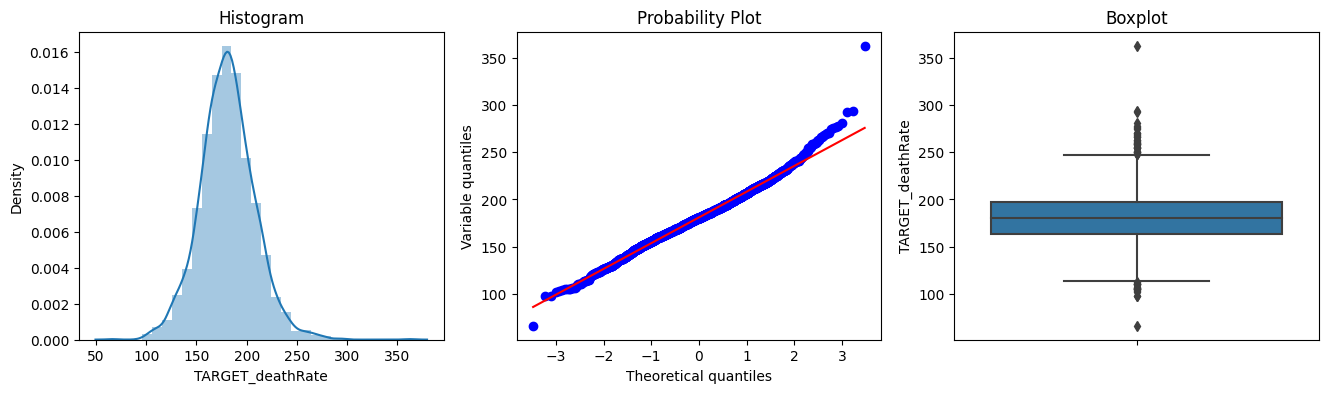

In [ ]:
# Discretized TARGET_deathRate, Let see the range of TARGET_deathRate values
diagnostic_plots(final_data, 'TARGET_deathRate')

In [ ]:
# We discretized TARGET_deathRate by quantile rate
lower_bound = final_data['TARGET_deathRate'].quantile(0.3)
upper_bound = final_data['TARGET_deathRate'].quantile(0.7)

final_data['TARGET_deathRate_class'] = final_data['TARGET_deathRate'].astype(int)

num_low = 0
num_med = 0
num_high = 0

for i in range(len(final_data['TARGET_deathRate'])):
  if final_data['TARGET_deathRate'][i] < lower_bound:
    final_data['TARGET_deathRate_class'][i] = 0 ## That mean low level death rate
    num_low+=1
  if final_data['TARGET_deathRate'][i] > upper_bound:
    final_data['TARGET_deathRate_class'][i] = 2 ## That mean high level death rate
    num_med+=1
  if final_data['TARGET_deathRate'][i] >= lower_bound and final_data['TARGET_deathRate'][i] <= upper_bound:
    final_data['TARGET_deathRate_class'][i] = 1 ## That mean high level death rate
    num_high+=1

print(lower_bound)
print(upper_bound)

print(f'Number low level samples: {num_low}')
print(f'Number medium level samples: {num_med}')
print(f'Number high level samples: {num_high}')

final_data

<ipython-input-62-3729a652652a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['TARGET_deathRate_class'][i] = 1 ## That mean high level death rate
<ipython-input-62-3729a652652a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['TARGET_deathRate_class'][i] = 0 ## That mean low level death rate
<ipython-input-62-3729a652652a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['TARGET_deathRate_class']

167.22
193.4
Number low level samples: 824
Number medium level samples: 823
Number high level samples: 1098


TARGET_deathRate  incidenceRate  povertyPercent  PctHS18_24  \
0                185.0          485.8            15.8        42.8   
1                126.0          320.2            11.7        21.1   
2                154.2          417.4            12.1        33.0   
3                148.2          429.0            24.0        20.8   
4                193.8          424.2            14.5        40.0   
...                ...            ...             ...         ...   
2740             217.1          538.7            20.3        63.6   
2741             192.7          471.1            13.0        34.4   
2742             148.4          405.5            18.7        27.0   
2743             182.2          462.5            18.5        34.6   
2744             238.2          423.9            16.4        29.7   

      PctHS25_Over  PctUnemployed16_Over  PctPublicCoverage  \
0             41.1                   7.5               40.1   
1             28.7                   1.5               25.7   
2             33.7                   5.9               30.5   
3             33.7                   8.5               32.0   
4             43.0                   7.6               33.5   
...            ...                   ...                ...   
2740          43.2                   7.7               40.9   
2741          46.0                   7.3               36.2   
2742          20.7                  10.0               32.9   
2743          26.4                  10.3               34.3   
2744          35.5                   6.1               32.8   

      PctPublicCoverageAlone   PctBlack  medIncome  PercentMarried  \
0                       20.9   1.356142    46895.0            55.5   
1                        8.0   1.482194    51817.0            60.8   
2                       14.8   0.378516    48622.0            59.6   
3                       18.0  45.715212    53679.0            36.1   
4                       16.9   3.391098    46447.0            51.0   
...                      ...        ...        ...             ...   
2740                    23.6   1.599129    36255.0            57.3   
2741                    19.6   0.621371    49516.0            55.9   
2742                    23.0   8.276140    55686.0            42.4   
2743                    20.7  19.068296    46073.0            49.2   
2744                    18.0   1.197933    42953.0            57.0   

      PctBachDeg18_24  PctBachDeg25_Over  PctEmployed16_Over  \
0                 5.0               10.3                58.1   
1                14.1               20.5                66.4   
2                 3.9               10.2                55.5   
3                 0.0               14.8                38.5   
4                 5.3                9.7                58.9   
...               ...                ...                 ...   
2740              0.0                8.4                50.8   
2741              3.7                8.1                58.4   
2742              9.9               19.8                58.0   
2743              6.1               14.7                55.5   
2744              1.9               10.2                56.9   

      PctPrivateCoverage  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
0                   68.4                49.900000                42.2   
1                   82.7                62.900000                49.7   
2                   66.3                50.900000                45.5   
3                   68.3                51.900000                47.7   
4                   72.9                45.726271                52.7   
...                  ...                      ...                 ...   
2740                57.8                43.200000                34.3   
2741                68.5                52.400000                48.3   
2742                55.0                47.400000                39.7   
2743                59.0                45.500000                36.5   
2744   

In [ ]:
final_data_class = final_data.drop(labels='TARGET_deathRate', axis=1)
final_data_class

incidenceRate  povertyPercent  PctHS18_24  PctHS25_Over  \
0             485.8            15.8        42.8          41.1   
1             320.2            11.7        21.1          28.7   
2             417.4            12.1        33.0          33.7   
3             429.0            24.0        20.8          33.7   
4             424.2            14.5        40.0          43.0   
...             ...             ...         ...           ...   
2740          538.7            20.3        63.6          43.2   
2741          471.1            13.0        34.4          46.0   
2742          405.5            18.7        27.0          20.7   
2743          462.5            18.5        34.6          26.4   
2744          423.9            16.4        29.7          35.5   

      PctUnemployed16_Over  PctPublicCoverage  PctPublicCoverageAlone  \
0                      7.5               40.1                    20.9   
1                      1.5               25.7                     8.0   
2                      5.9               30.5                    14.8   
3                      8.5               32.0                    18.0   
4                      7.6               33.5                    16.9   
...                    ...                ...                     ...   
2740                   7.7               40.9                    23.6   
2741                   7.3               36.2                    19.6   
2742                  10.0               32.9                    23.0   
2743                  10.3               34.3                    20.7   
2744                   6.1               32.8                    18.0   

       PctBlack  medIncome  PercentMarried  PctBachDeg18_24  \
0      1.356142    46895.0            55.5              5.0   
1      1.482194    51817.0            60.8             14.1   
2      0.378516    48622.0            59.6              3.9   
3     45.715212    53679.0            36.1              0.0   
4      3.391098    46447.0            51.0              5.3   
...         ...        ...             ...              ...   
2740   1.599129    36255.0            57.3              0.0   
2741   0.621371    49516.0            55.9              3.7   
2742   8.276140    55686.0            42.4              9.9   
2743  19.068296    46073.0            49.2              6.1   
2744   1.197933    42953.0            57.0              1.9   

      PctBachDeg25_Over  PctEmployed16_Over  PctPrivateCoverage  \
0                  10.3                58.1                68.4   
1                  20.5                66.4                82.7   
2                  10.2                55.5                66.3   
3                  14.8                38.5                68.3   
4                   9.7                58.9                72.9   
...                 ...                 ...                 ...   
2740                8.4                50.8                57.8   
2741                8.1                58.4                68.5   
2742               19.8                58.0                55.0   
2743               14.7                55.5                59.0   
2744               10.2                56.9                62.3   

      PctPrivateCoverageAlone  PctEmpPrivCoverage  PctMarriedHouseholds  \
0                   49.900000                42.2             53.242032   
1                   62.900000                49.7             58.630394   
2                   50.900000                45.5             62.822695   
3                   51.900000                47.7             54.436206   
4                   45.726271                52.7             49.513248   
...                       ...                 ...                   ...   
2740                43.200000                34.3             54.159593   
2741                52.400000                48.3             56.003473   
2742                47.400000                39.7             44.581650   
2743                45.500000       

In [ ]:
X_class = final_data_class.drop(labels='TARGET_deathRate_class', axis=1)
y_class = final_data_class['TARGET_deathRate_class']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class,y_class,train_size=0.8)
X_class

incidenceRate  povertyPercent  PctHS18_24  PctHS25_Over  \
0             485.8            15.8        42.8          41.1   
1             320.2            11.7        21.1          28.7   
2             417.4            12.1        33.0          33.7   
3             429.0            24.0        20.8          33.7   
4             424.2            14.5        40.0          43.0   
...             ...             ...         ...           ...   
2740          538.7            20.3        63.6          43.2   
2741          471.1            13.0        34.4          46.0   
2742          405.5            18.7        27.0          20.7   
2743          462.5            18.5        34.6          26.4   
2744          423.9            16.4        29.7          35.5   

      PctUnemployed16_Over  PctPublicCoverage  PctPublicCoverageAlone  \
0                      7.5               40.1                    20.9   
1                      1.5               25.7                     8.0   
2                      5.9               30.5                    14.8   
3                      8.5               32.0                    18.0   
4                      7.6               33.5                    16.9   
...                    ...                ...                     ...   
2740                   7.7               40.9                    23.6   
2741                   7.3               36.2                    19.6   
2742                  10.0               32.9                    23.0   
2743                  10.3               34.3                    20.7   
2744                   6.1               32.8                    18.0   

       PctBlack  medIncome  PercentMarried  PctBachDeg18_24  \
0      1.356142    46895.0            55.5              5.0   
1      1.482194    51817.0            60.8             14.1   
2      0.378516    48622.0            59.6              3.9   
3     45.715212    53679.0            36.1              0.0   
4      3.391098    46447.0            51.0              5.3   
...         ...        ...             ...              ...   
2740   1.599129    36255.0            57.3              0.0   
2741   0.621371    49516.0            55.9              3.7   
2742   8.276140    55686.0            42.4              9.9   
2743  19.068296    46073.0            49.2              6.1   
2744   1.197933    42953.0            57.0              1.9   

      PctBachDeg25_Over  PctEmployed16_Over  PctPrivateCoverage  \
0                  10.3                58.1                68.4   
1                  20.5                66.4                82.7   
2                  10.2                55.5                66.3   
3                  14.8                38.5                68.3   
4                   9.7                58.9                72.9   
...                 ...                 ...                 ...   
2740                8.4                50.8                57.8   
2741                8.1                58.4                68.5   
2742               19.8                58.0                55.0   
2743               14.7                55.5                59.0   
2744               10.2                56.9                62.3   

      PctPrivateCoverageAlone  PctEmpPrivCoverage  PctMarriedHouseholds  \
0                   49.900000                42.2             53.242032   
1                   62.900000                49.7             58.630394   
2                   50.900000                45.5             62.822695   
3                   51.900000                47.7             54.436206   
4                   45.726271                52.7             49.513248   
...                       ...                 ...                   ...   
2740                43.200000                34.3             54.159593   
2741                52.400000                48.3             56.003473   
2742                47.400000                39.7             44.581650   
2743                45.500000       

### Decision Tree Classifier

#### Entropy

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train_class, y_train_class)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test_class)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test_class, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test_class, tree_pred))

Accuracy: 0.5355191256830601
Report:               precision    recall  f1-score   support

           0       0.58      0.55      0.57       169
           1       0.50      0.49      0.49       221
           2       0.54      0.58      0.56       159

    accuracy                           0.54       549
   macro avg       0.54      0.54      0.54       549
weighted avg       0.54      0.54      0.54       549



In [ ]:
tree_cm = metrics.confusion_matrix(y_test_class, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.5355191256830601')

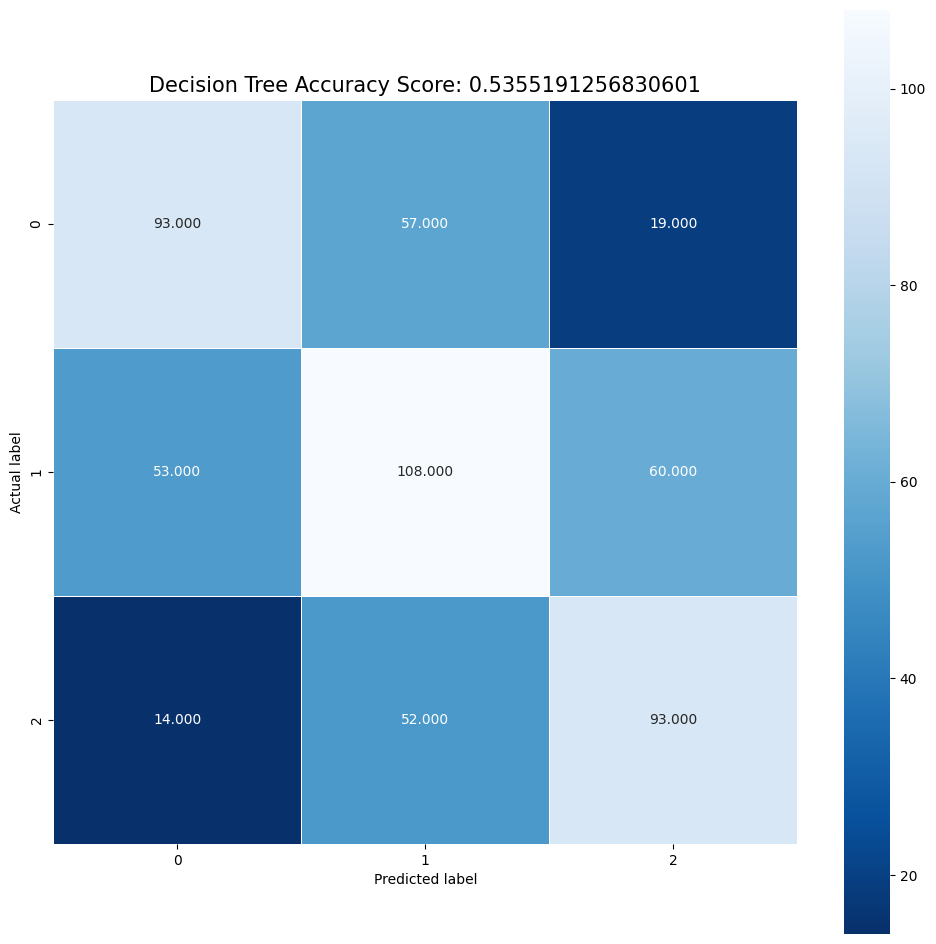

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

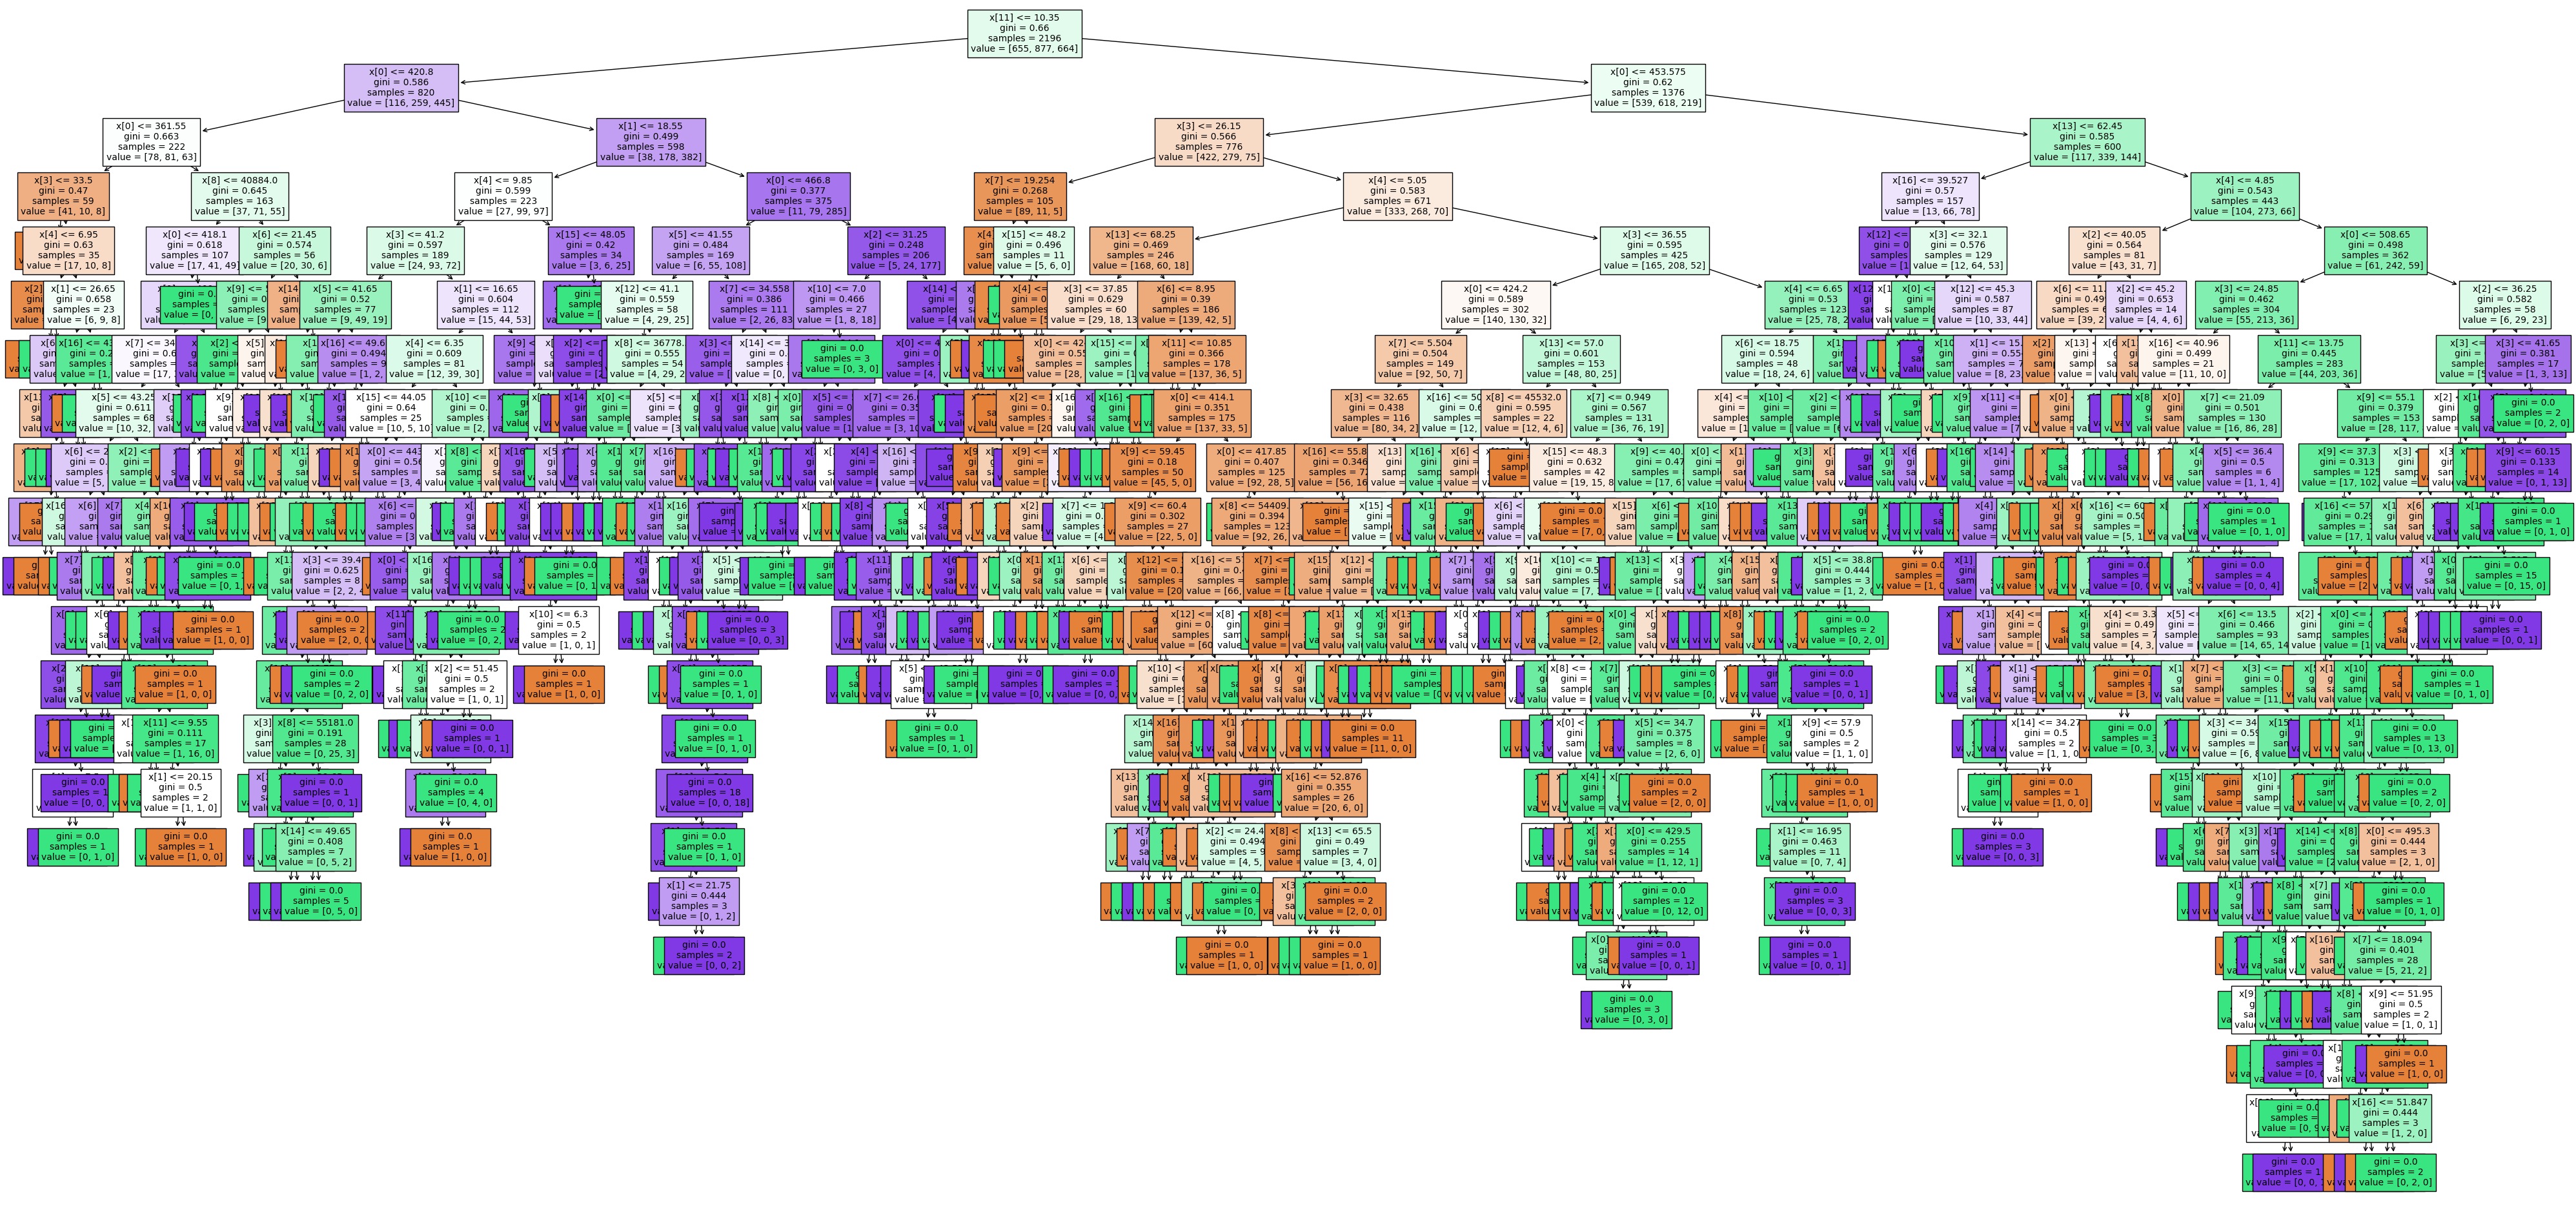

In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_entropy', dpi=100)
plt.show()

#### Gini

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test_class)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test_class, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test_class, tree_pred))

Accuracy: 0.5646630236794171
Report:               precision    recall  f1-score   support

           0       0.57      0.60      0.59       169
           1       0.55      0.51      0.53       221
           2       0.57      0.60      0.58       159

    accuracy                           0.56       549
   macro avg       0.57      0.57      0.57       549
weighted avg       0.56      0.56      0.56       549



In [ ]:
tree_cm = metrics.confusion_matrix(y_test_class, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.5646630236794171')

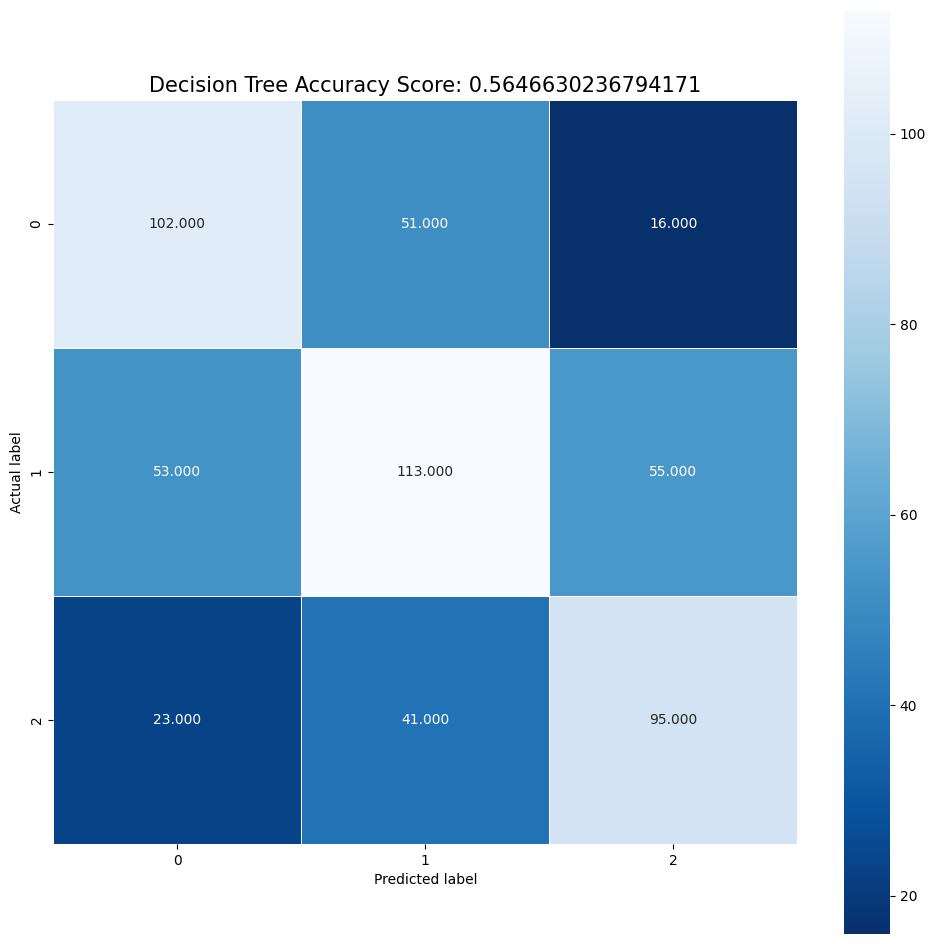

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

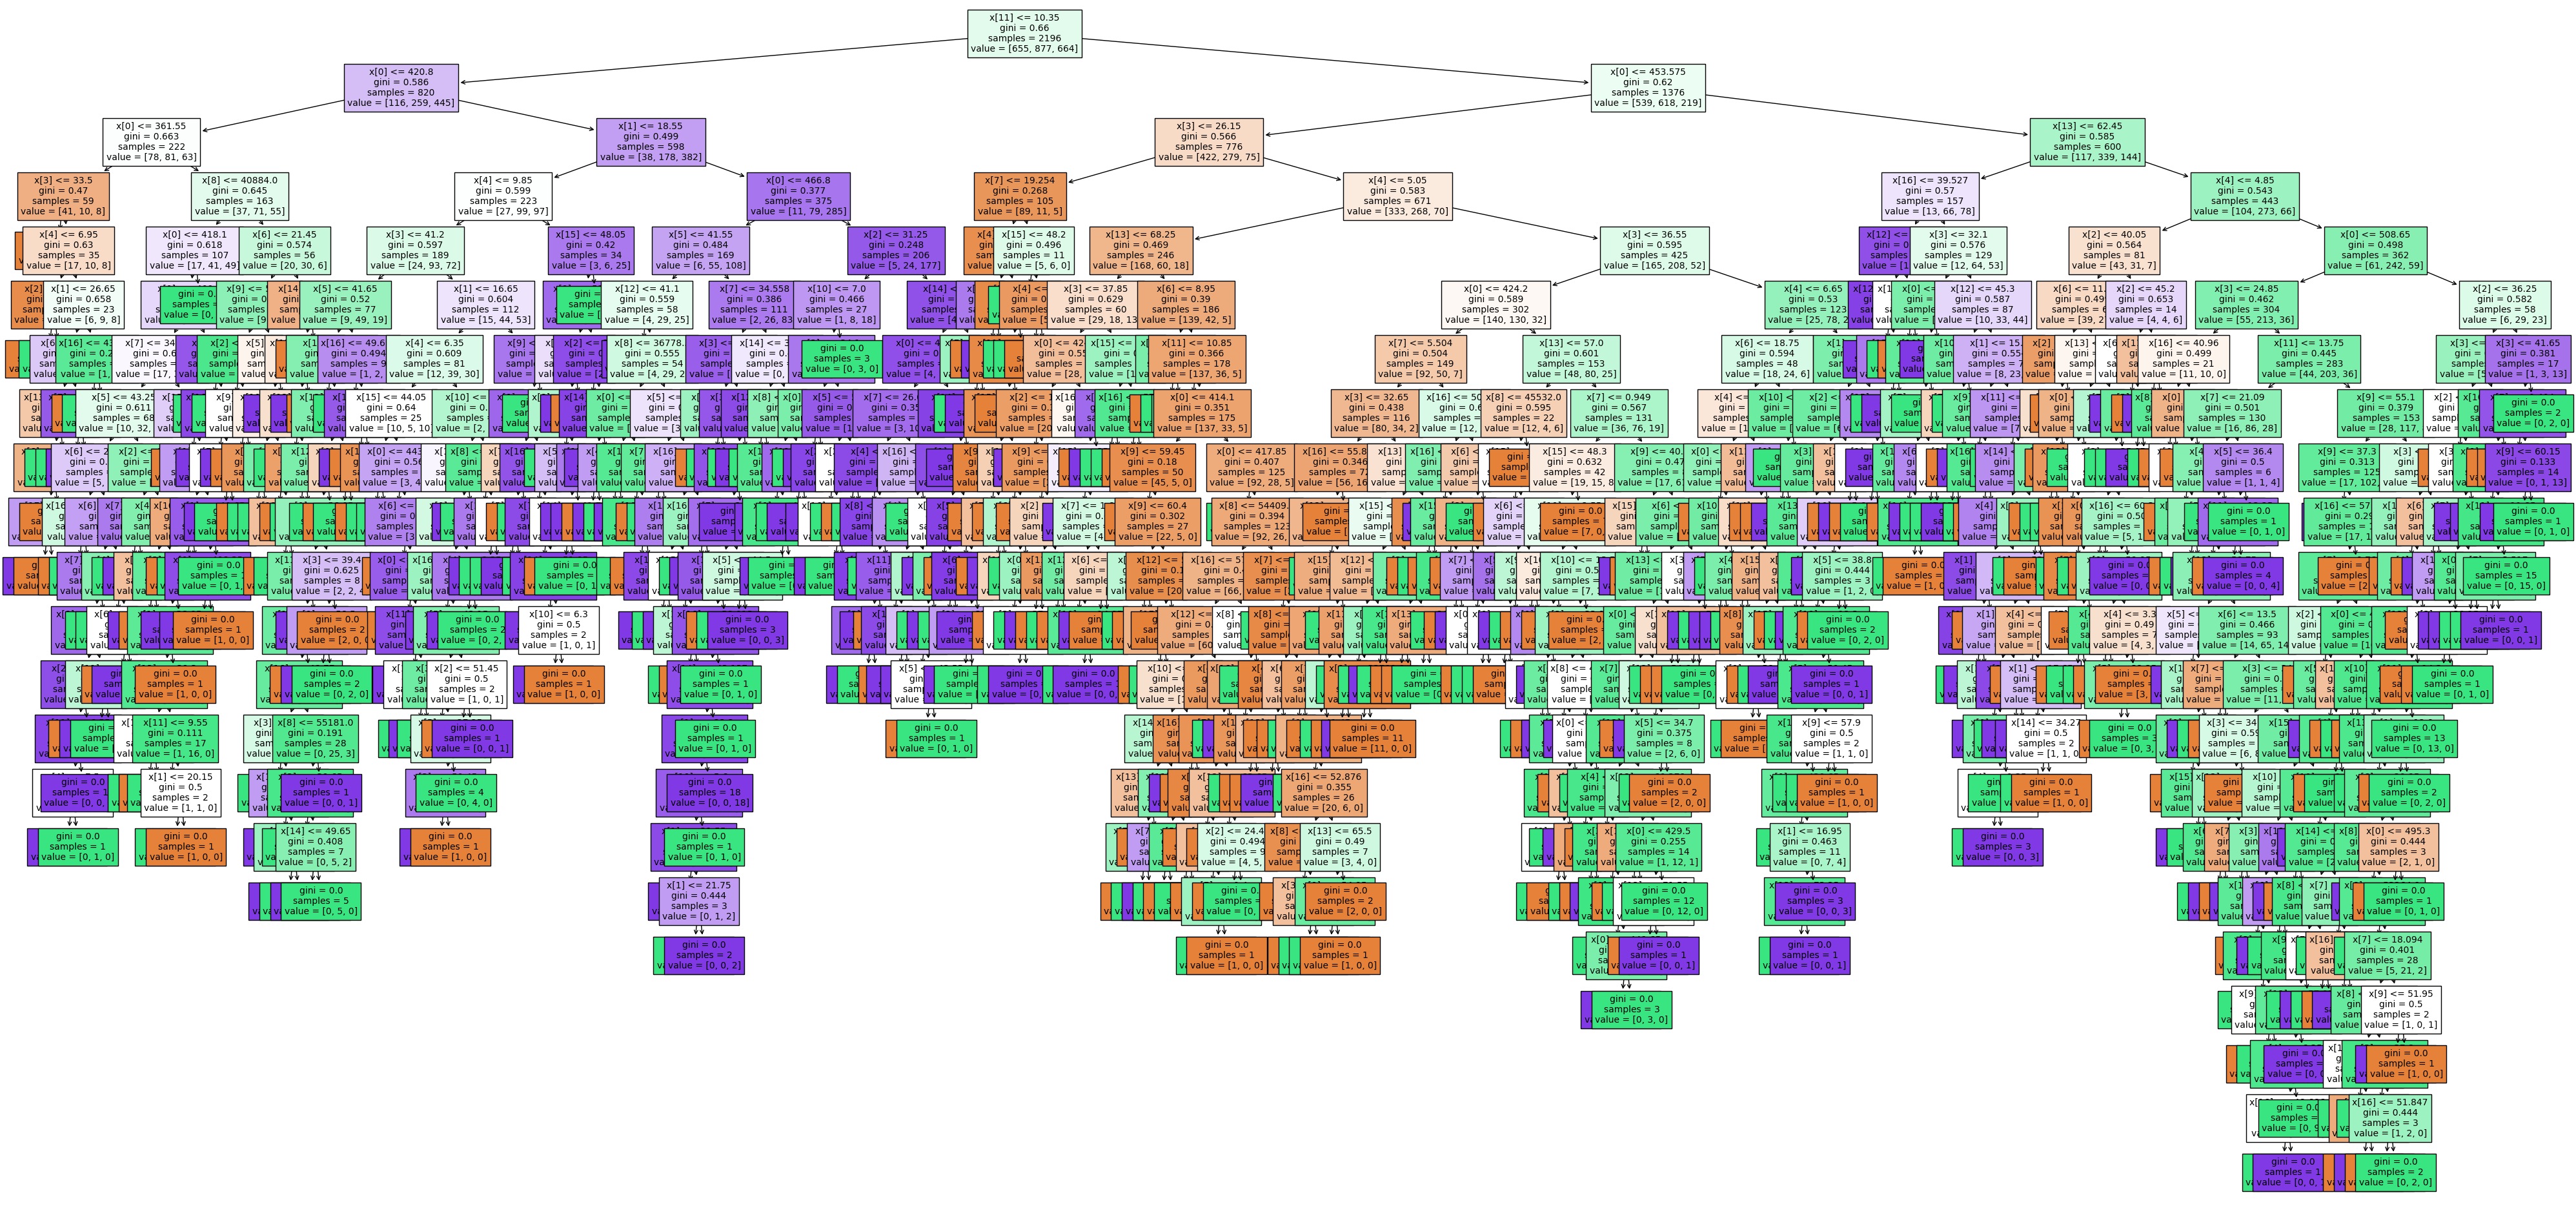

In [ ]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_gini', dpi=100)
plt.show()

### Naive Bayes

In [ ]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train_class, y_train_class).predict(X_test_class)

In [ ]:
#Model Accuracy, how often is the classifier correct ?
bayes_score = metrics.accuracy_score(y_test_class, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test_class,bayes_pred))

Accuracy: 0.5774134790528234
Report:               precision    recall  f1-score   support

           0       0.71      0.57      0.63       169
           1       0.56      0.56      0.56       221
           2       0.50      0.62      0.55       159

    accuracy                           0.58       549
   macro avg       0.59      0.58      0.58       549
weighted avg       0.59      0.58      0.58       549



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.5774134790528234')

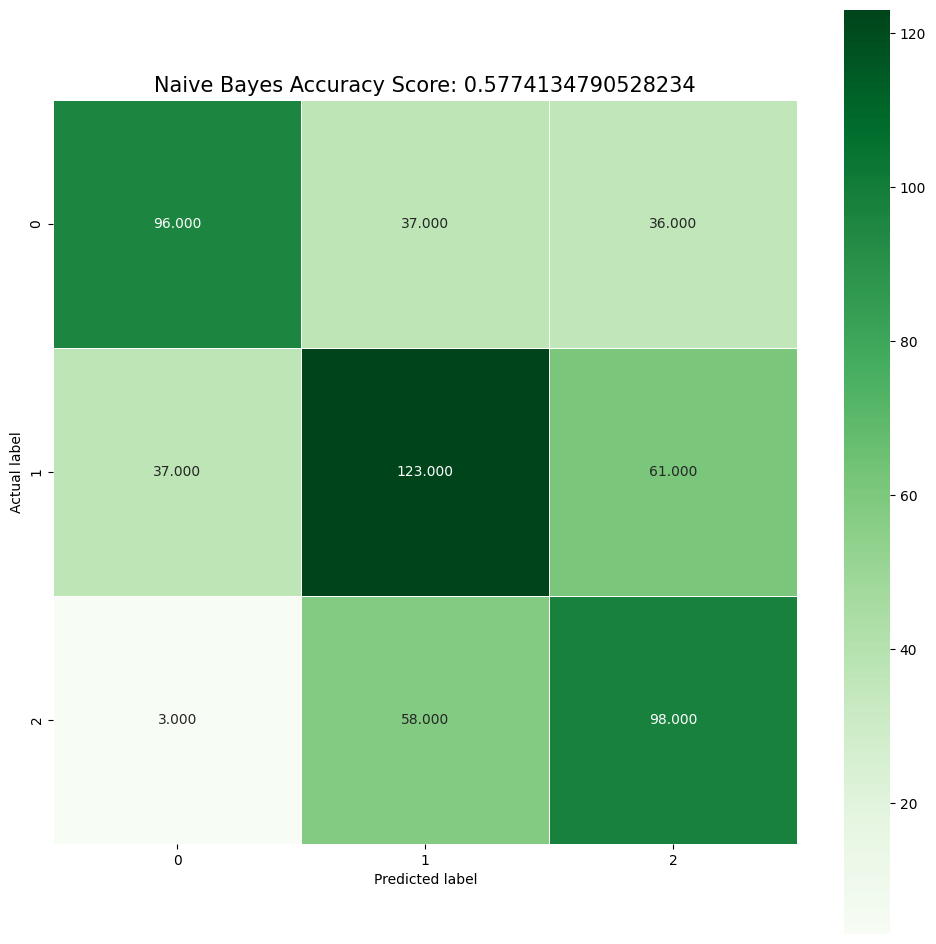

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test_class,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15)

### Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train_class, y_train_class)
y_pred = rf.predict(X_test_class)

classes = target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_class, y_pred, target_names=classes))

              precision    recall  f1-score   support

     class 0       0.75      0.66      0.70       169
     class 1       0.62      0.67      0.65       221
     class 2       0.65      0.66      0.66       159

    accuracy                           0.66       549
   macro avg       0.67      0.66      0.67       549
weighted avg       0.67      0.66      0.67       549



### Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
log = LogisticRegression()
log.fit(X_train_class, y_train_class)
y_pred = log.predict(X_test_class)

classes = target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_class, y_pred, target_names=classes))

              precision    recall  f1-score   support

     class 0       0.70      0.59      0.64       169
     class 1       0.58      0.65      0.62       221
     class 2       0.64      0.64      0.64       159

    accuracy                           0.63       549
   macro avg       0.64      0.63      0.63       549
weighted avg       0.63      0.63      0.63       549



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
